# Khám phá dữ liệu

## I. Tổng quan về dữ liệu

## 1. Thông tin cơ bản


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Đọc dataset
df = pd.read_csv('../data/players_data.csv')

# In 5 dòng đầu của dữ liệu
print("\n5 dòng đầu:")
display(df.head())

# Số dòng và số cột
num_rows, num_cols = df.shape
print(f"Số dòng: {num_rows}")
print(f"Số cột: {num_cols}")

# Kích thước của dataset
dataset_size_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"Overall size: {dataset_size_mb:.2f} MB")


5 dòng đầu:


,name,age_at_last_season,country_of_birth,country_of_citizenship,position,sub_position,foot,height_in_cm,current_club_name,current_club_domestic_competition_id,club_position,last_season,contract_expiration_date,market_value_in_eur,agent_name,total_goals,total_assists,total_minutes_played,total_yellow_cards,total_red_cards
0,Miroslav Klose,37.00,Poland,Germany,Attack,Centre-Forward,right,184.00,Società Sportiva Lazio S.p.A.,serie-a,8.00,2015,NaN,1000000.00,ASBW Sport Marketing,12,8,2429,6,0
1,Roman Weidenfeller,37.00,Germany,Germany,Goalkeeper,Goalkeeper,left,190.00,Borussia Dortmund,bundesliga,4.00,2017,NaN,750000.00,Neubauer 13 GmbH,0,0,181,0,0
2,Dimitar Berbatov,34.00,Bulgaria,Bulgaria,Attack,Centre-Forward,NaN,NaN,Panthessalonikios Athlitikos Omilos Konstantin...,super-league-1,NaN,2015,NaN,1000000.00,CSKA-AS-23 Ltd.,6,0,1656,0,0
3,Lúcio,34.00,Brazil,Brazil,Defender,Centre-Back,NaN,NaN,Juventus Football Club,serie-a,1.00,2012,NaN,200000.00,NaN,0,0,307,0,0
4,Tom Starke,36.00,East Germany (GDR),Germany,Goalkeeper,Goalkeeper,right,194.00,FC Bayern München,bundesliga,NaN,2017,NaN,100000.00,IFM,0,0,450,0,0


Số dòng: 32601
Số cột: 20
Overall size: 20.62 MB


### 2. Ý nghĩa mỗi dòng
Mỗi dòng là hồ sơ của một cầu thủ ở mùa giải gần nhất họ được ghi lại. 

### 3. Tính toàn vẹn dữ liệu.

Ta sẽ kiểm tra xem có dòng nào bị trùng lặp và có dòng nào trống hoàn toàn không. 
Với kiểm tra trùng lặp ta sử dụng các hàm `dupicated` và `sum` để kiểm tra xem có bao nhiêu dòng bị lặp và lưu vào biến `duplicates`.
Kiểm tra dòng trống hoàn toàn ta sử dụng `isnull`, `all` và `sum` để kiểm tra rồi lưu vào biến `empty_rows`.

In [22]:
# Kiểm tra dòng bị trùng lặp
duplicates = df.duplicated().sum()
print(f"Số dòng bị trùng lặp: {duplicates}")

# Kiểm tra dòng trống hoàn toàn
empty_rows = df.isnull().all(axis=1).sum()
print(f"Số dòng trống hoàn toàn: {empty_rows}")

Số dòng bị trùng lặp: 0
Số dòng trống hoàn toàn: 0


### 4. Kiếm kê cột


#### 4.1: Ý nghĩa từng cột
* "name": Tên của cầu thủ
* "age_at_last_season": Tuổi của cầu thủ tại mùa giải đó
* "last_season": Mùa giải ghi nhận hồ sơ
* "country_of_birth": Đất nước sinh ra
* "country_of_citizenship": Quốc tịch của cầu thủ
* "position": Vị trí thi đấu của cầu thủ (chỉ bao gồm tiền đạo, tiền vệ, hậu vệ, thủ môn)
* "sub_position": Vị trí thi đấu chi tiết của cầu thủ trên sân
* "foot": Chân thuận của cầu thủ
* "height_in_cm": Chiều cao của cầu thủ (Tính bằng cm)
* "current_club_name": Tên câu lạc bộ cầu thủ đang thi đấu
* "current_club_domestic_competition_id": Giải vô địch quốc gia cầu thủ đang thi đấu
* "club_position": Thứ hạng clb của cầu thủ tại giải vô địch quốc gia
* "contract_expiration_date": Ngày hết hạn hợp đồng của cầu thủ với clb
* "agent_name": Tên người/đơn vị quản lý của cầu thủ
* "market_value_in_eur": Giá trị chuyển nhượng của cầu thủ tại thời điểm ghi nhận (tính bằng euro)
* "total_goals": Tổng số bàn thắng cầu thủ ghi được
* "total_assists": Tổng số kiến tạo của cầu thủ
* "total_minutes_played": Tổng thời lượng cầu thủ đã thi đấu trong mùa giải
* "total_yellow_cards": Tống số thể vàng của cầu thủ
* "total_red_cards": Tổng số thẻ đỏ của cầu thủ

#### 4.2: Kiểu dữ liệu mỗi cột

In [23]:
# Kiểu dữ liệu mỗi cột
print("Current data types:")
print(df.dtypes)

Current data types:
name                                     object
age_at_last_season                      float64
country_of_birth                         object
country_of_citizenship                   object
position                                 object
sub_position                             object
foot                                     object
height_in_cm                            float64
current_club_name                        object
current_club_domestic_competition_id     object
club_position                           float64
last_season                               int64
contract_expiration_date                 object
market_value_in_eur                     float64
agent_name                               object
total_goals                               int64
total_assists                             int64
total_minutes_played                      int64
total_yellow_cards                        int64
total_red_cards                           int64
dtype: object


### 5. Phân tích biến định lượng

### 5.1: Phân tích phân phối
Sử dụng hàm `describer` để xem thống kê mô tả cho các cột biến định lượng

In [24]:
# Danh sách cột số cần phân tích
numerical_cols = ['last_season', 'height_in_cm', 'market_value_in_eur','club_position', 'age_at_last_season', 
                  'total_goals', 'total_assists', 'total_minutes_played', 'total_yellow_cards', 'total_red_cards']

# Lấy thống kê mô tả CHỈ cho các cột này
stats = df[numerical_cols].describe().T

# Tạo cột median từ cột 50%
stats['median'] = stats['50%']

# Sắp xếp lại thứ tự cột cho dễ nhìn
columns_order = ['count', 'mean', 'std', 'min', '25%', 'median', '75%', 'max']
final_table = stats[columns_order]

# Định dạng hiển thị số thực (2 chữ số thập phân)
pd.options.display.float_format = '{:.2f}'.format

# Hiển thị bảng
display(final_table)

,count,mean,std,min,25%,median,75%,max
last_season,32601.00,2019.36,3.96,2012.00,2016.00,2020.00,2023.00,2024.00
height_in_cm,30345.00,182.29,7.04,17.00,178.00,183.00,187.00,210.00
market_value_in_eur,31078.00,1639685.31,6407293.18,10000.00,100000.00,250000.00,700000.00,200000000.00
club_position,30164.00,11.34,5.15,1.00,7.00,12.00,16.00,21.00
age_at_last_season,32554.00,24.76,5.26,14.00,20.00,24.00,29.00,46.00
total_goals,32601.00,0.80,2.18,0.00,0.00,0.00,1.00,45.00
total_assists,32601.00,0.63,1.51,0.00,0.00,0.00,1.00,27.00
total_minutes_played,32601.00,636.87,842.04,0.00,0.00,213.00,1057.00,4860.00
total_yellow_cards,32601.00,1.43,2.30,0.00,0.00,0.00,2.00,19.00
total_red_cards,32601.00,0.04,0.20,0.00,0.00,0.00,0.00,3.00


### 5.2: Trực quan hóa
Vẽ biểu đồ Histogram (để xem phân phối) và Box Plot (để xem outliers) cho từng cột số.

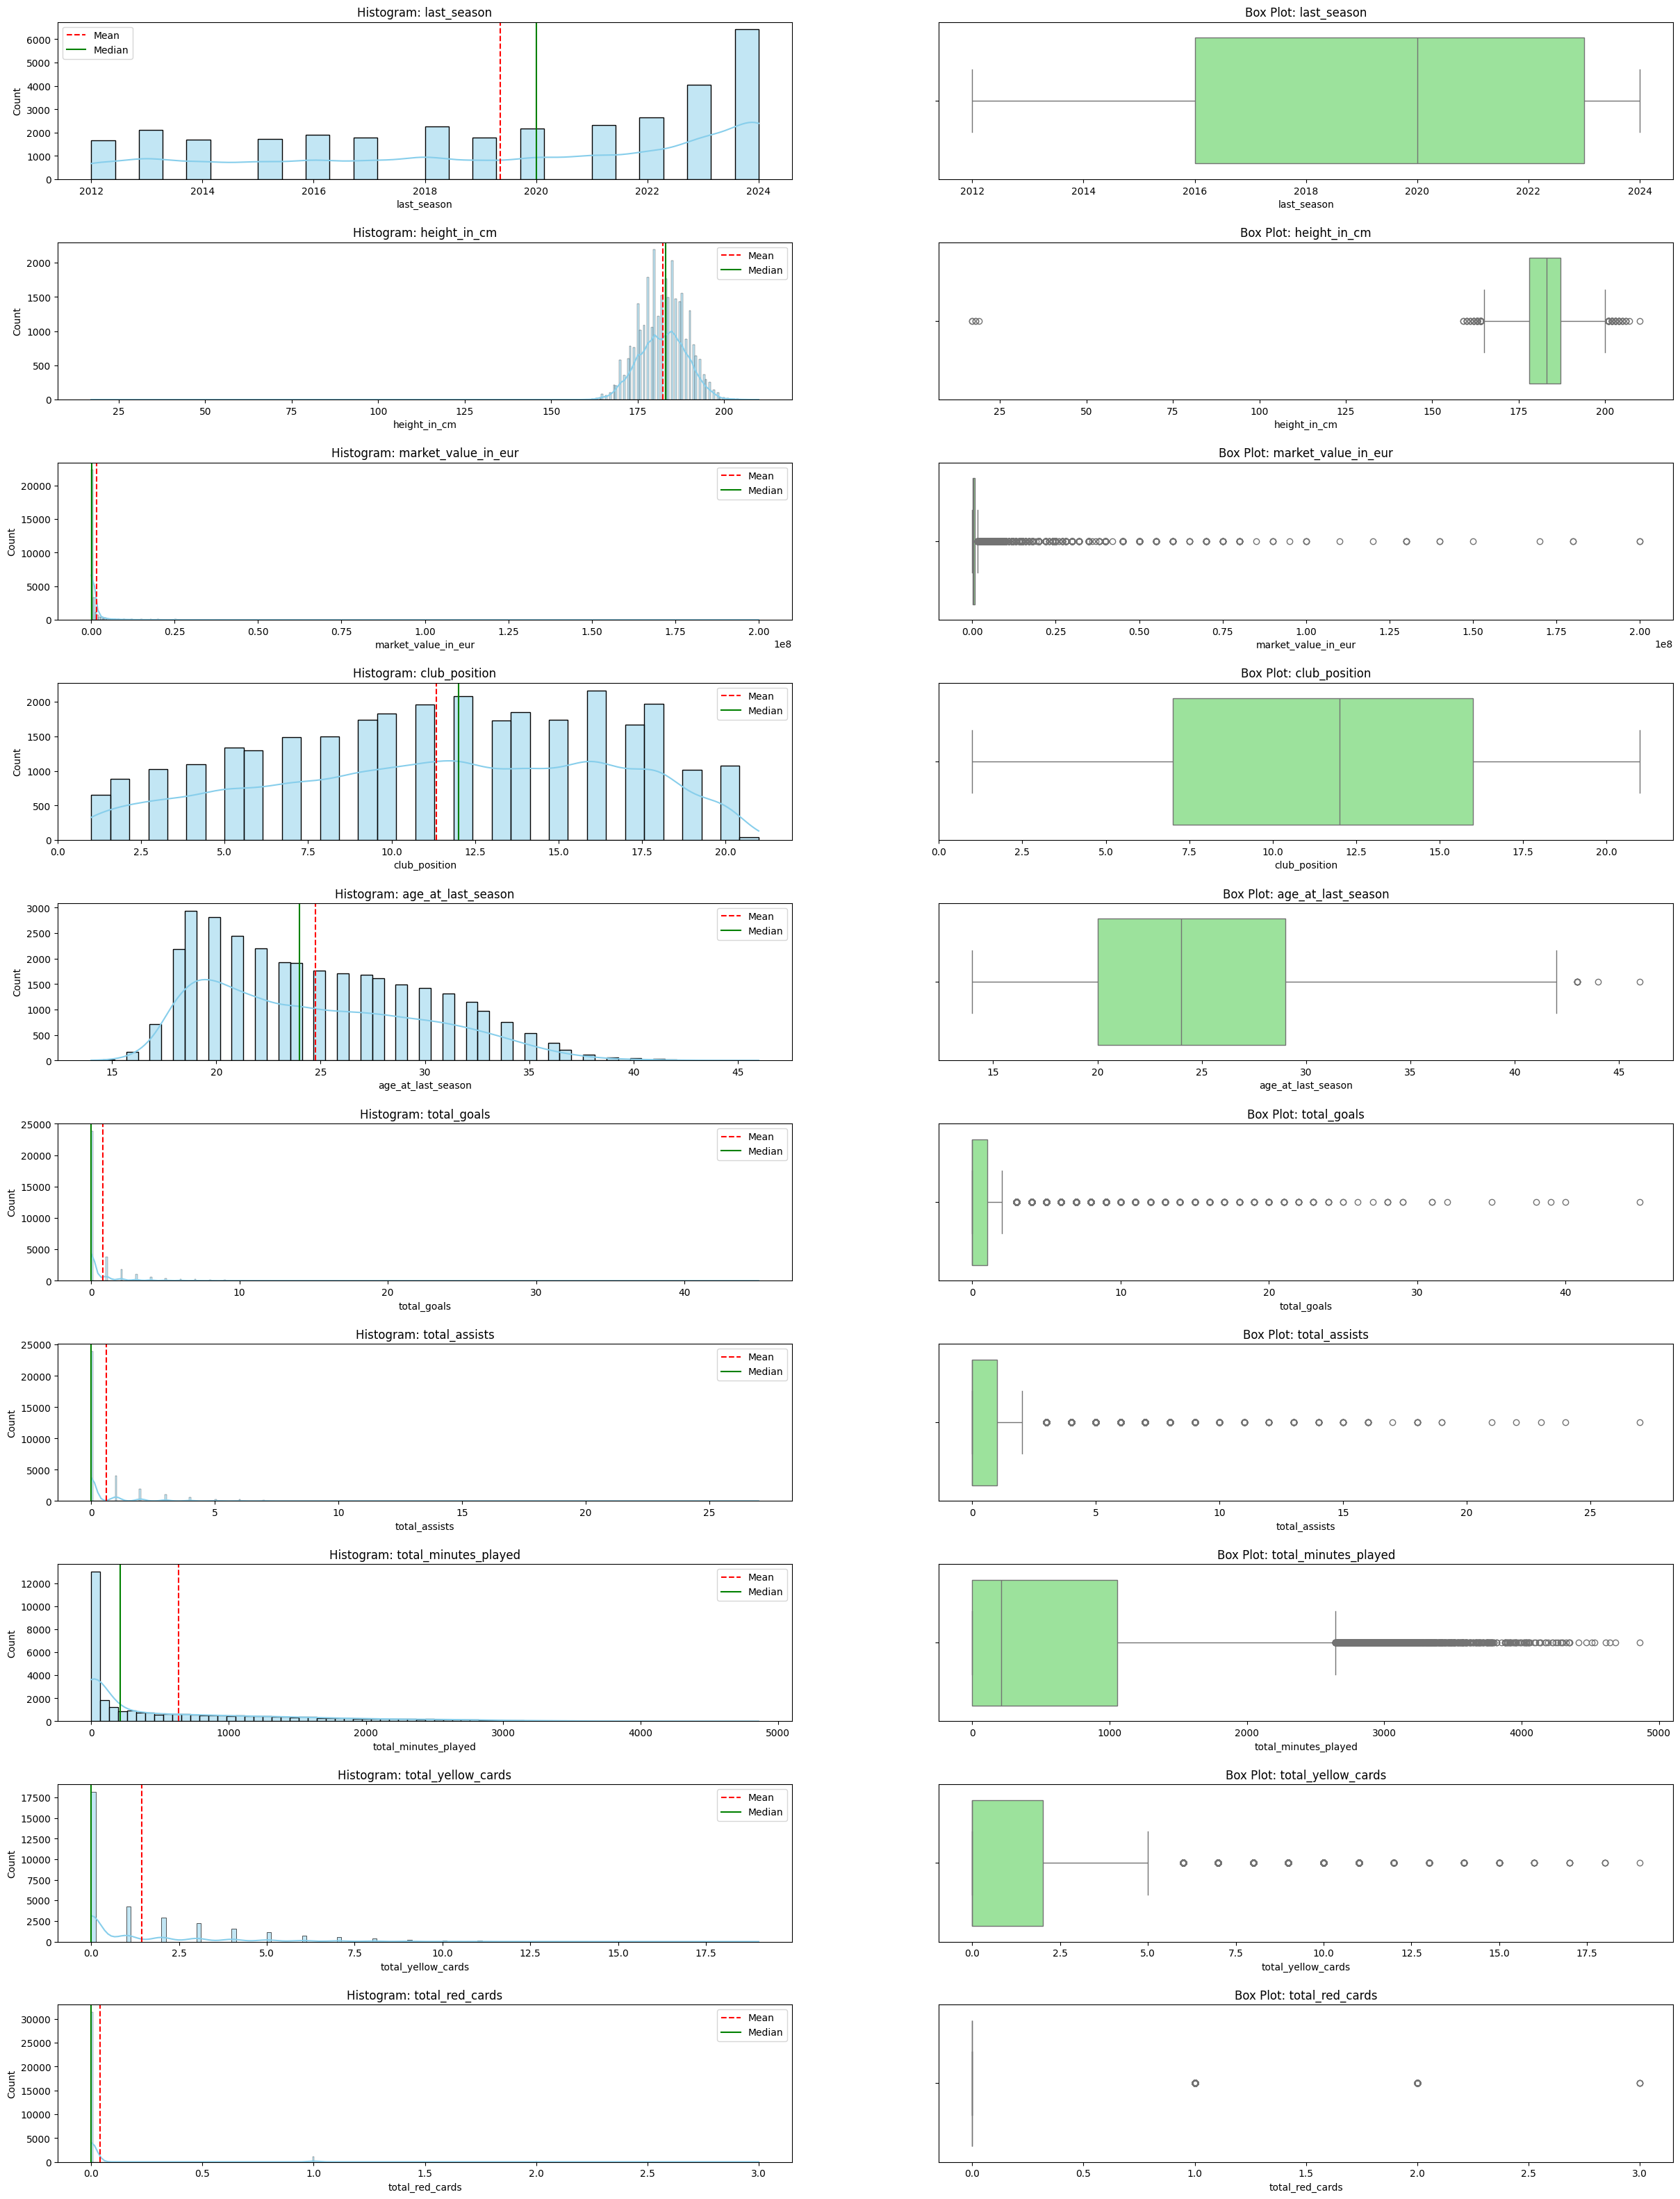

In [25]:

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(30, 40))
plt.subplots_adjust(hspace=0.4) # Khoảng cách giữa các hàng

for i, col in enumerate(numerical_cols):
    # Lấy dữ liệu (bỏ giá trị null để vẽ không bị lỗi)
    col_data = df[col].dropna()

    # 1. Vẽ Histogram (Biểu đồ phân phối)
    sns.histplot(col_data, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histogram: {col}')
    axes[i, 0].axvline(col_data.mean(), color='red', linestyle='--', label='Mean')
    axes[i, 0].axvline(col_data.median(), color='green', linestyle='-', label='Median')
    axes[i, 0].legend()

    # 2. Vẽ Box Plot (Biểu đồ hộp)
    sns.boxplot(x=col_data, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Box Plot: {col}')

plt.show()

# Phân tích Phân phối Dữ liệu (Univariate Analysis)

Dựa trên biểu đồ Histogram và Box Plot của 10 thuộc tính, ta có những quan sát chi tiết sau:

**1. last_season (Mùa giải cuối cùng)**
* **Phân phối:** Lệch trái (Left-skewed).
* **Nhận xét:** Dữ liệu tập trung rất mạnh vào các năm gần đây, đặc biệt là giai đoạn 2023-2024. Số lượng bản ghi giảm dần khi lùi về quá khứ (2012). Điều này cho thấy dataset ưu tiên cập nhật thông tin của các cầu thủ hiện đang thi đấu hoặc mới giải nghệ/chuyển nhượng gần đây.

**2. height_in_cm (Chiều cao)**
* **Phân phối:** Xấp xỉ phân phối chuẩn (Normal distribution).
* **Nhận xét:** Đường Mean và Median gần như trùng nhau (khoảng 180cm - 182cm). Biểu đồ Box Plot cho thấy có các điểm ngoại lai (outliers) ở cả hai phía (quá thấp hoặc quá cao) nhưng số lượng không lớn. Đây là phân phối vật lý điển hình của vận động viên thể thao.

**3. market_value_in_eur (Giá trị thị trường)**
* **Phân phối:** Lệch phải cực mạnh (Highly Right-skewed).
* **Nhận xét:**
    * Đa số các cầu thủ có giá trị thị trường thấp hoặc trung bình (tập trung dày đặc quanh mốc 0).
    * Mean lớn hơn Median rất nhiều do bị kéo bởi các giá trị cực đại.
    * **Outliers:** Xuất hiện rất nhiều điểm ngoại lai ở phía giá trị cao. Đây đại diện cho các "siêu sao" bóng đá với mức định giá hàng chục hoặc hàng trăm triệu Euro.
    * *Lưu ý:* Cần xử lý log-transformation nếu đưa biến này vào mô hình máy học.

**4. age_at_last_season (Tuổi tại mùa giải cuối)**
* **Phân phối:** Lệch phải (Right-skewed).
* **Nhận xét:**
    * Độ tuổi tập trung chủ yếu ở nhóm trẻ, với đỉnh (mode) rơi vào khoảng 19-21 tuổi.
    * Median (Trung vị) nằm ở khoảng 24 tuổi.
    * Số lượng cầu thủ giảm dần khi độ tuổi tăng lên (trên 30 tuổi), phù hợp với đặc thù tuổi nghề ngắn của bóng đá.

**5. club_position (Thứ hạng của CLB)**
* **Phân phối:** Tương đối đồng đều (Uniform-like) nhưng có biến động.
* **Nhận xét:**
    * Dữ liệu trải dài từ 1 đến 20, tương ứng với số lượng đội bóng tiêu chuẩn trong các giải VĐQG hàng đầu.
    * Biểu đồ Histogram cho thấy số lượng cầu thủ thu thập được từ các đội có thứ hạng khác nhau không hoàn toàn bằng nhau.
    * Box Plot có trung vị (Median) nằm khoảng 11-12 (khu vực giữa bảng xếp hạng). Không xuất hiện outliers, chứng tỏ dữ liệu nằm đúng trong phạm vi hợp lệ.

**6. total_goals (Tổng số bàn thắng)**
* **Phân phối:** Lệch phải cực mạnh (Highly Right-skewed) - Phân phối Zero-inflated.
* **Nhận xét:**
    * Phần lớn cầu thủ có số bàn thắng là 0 (do vị trí thủ môn, hậu vệ chiếm đa số).
    * **Outliers:** Box Plot xuất hiện chuỗi ngoại lai dài, đạt tới mức trên 40 bàn thắng. Đây là nhóm các tiền đạo hàng đầu.

**7. total_assists (Tổng số kiến tạo)**
* **Phân phối:** Lệch phải cực mạnh (Highly Right-skewed).
* **Nhận xét:**
    * Tương tự như bàn thắng, đa số cầu thủ không có kiến tạo nào (Median = 0).
    * Số lượng cầu thủ có kiến tạo cao giảm rất nhanh. Các điểm ngoại lai (trên 20 kiến tạo) đại diện cho những "nhạc trưởng" xuất sắc nhất giải đấu.

**8. total_minutes_played (Tổng số phút thi đấu)**
* **Phân phối:** Lệch phải (Right-skewed) và có xu hướng hai cực (Bimodal tendency).
* **Nhận xét:**
    * Có một lượng lớn cầu thủ có số phút thi đấu gần bằng 0 (cầu thủ dự bị ít được ra sân).
    * Phần còn lại phân phối trải dài, tập trung nhẹ ở khoảng 2000-3000 phút (cầu thủ đá chính thường xuyên).
    * Dải giá trị (IQR) trên Box Plot rất rộng, phản ánh sự chênh lệch lớn về thời lượng thi đấu trong đội hình.

**9. total_yellow_cards (Tổng thẻ vàng)**
* **Phân phối:** Lệch phải (Right-skewed).
* **Nhận xét:**
    * Phần lớn cầu thủ nhận ít thẻ (0-2 thẻ). Đỉnh (mode) rơi vào khoảng 0-1 thẻ.
    * Box Plot cho thấy nhiều outliers ở mức cao (trên 5 thẻ), cá biệt có trường hợp gần 18 thẻ vàng (thường là các vị trí phòng ngự quyết liệt).

**10. total_red_cards (Tổng thẻ đỏ)**
* **Phân phối:** Rời rạc và tập trung cực đoan tại 0 (Extreme Zero-inflated).
* **Nhận xét:**
    * Đây là biến cố hiếm (rare event). Hầu hết cầu thủ không nhận thẻ đỏ nào trong mùa giải.
    * Box Plot gần như là một đường thẳng tại vạch 0, chỉ xuất hiện vài điểm ngoại lai đơn lẻ ở mức 1 hoặc 2 thẻ.
    * *Lưu ý:* Biến này có phương sai (variance) rất thấp, cần cân nhắc khi chọn làm đặc trưng (feature) cho mô hình.

---
**Tổng kết chung:** Dataset mang đặc trưng rõ rệt của dữ liệu thể thao với nhiều biến lệch phải và chứa nhiều điểm dữ liệu bằng 0. Cần chú ý xử lý ngoại lai (outliers) và chuẩn hóa dữ liệu (scaling) phù hợp trước khi xây dựng mô hình dự đoán.

### 5.3: Phân tích phạm vi và outlier
Sử dụng IQR để tính toán các giá trị ngoại lai

In [26]:
for col in numerical_cols:
    col_data = df[col].dropna()
    
    # Min/Max
    min_val = col_data.min()
    max_val = col_data.max()
    
    # Tính toán IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Đếm số lượng outliers
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    num_outliers = len(outliers)
    
    print(f"\nCột: {col}")
    print(f"- Min: {min_val} | Max: {max_val}")
    print(f"- Số lượng Outliers: {num_outliers}")
    if num_outliers > 0:
        print(f"- Ví dụ vài giá trị outliers: {outliers.head(3).tolist()}")


Cột: last_season
- Min: 2012 | Max: 2024
- Số lượng Outliers: 0

Cột: height_in_cm
- Min: 17.0 | Max: 210.0
- Số lượng Outliers: 146
- Ví dụ vài giá trị outliers: [201.0, 164.0, 205.0]

Cột: market_value_in_eur
- Min: 10000.0 | Max: 200000000.0
- Số lượng Outliers: 4387
- Ví dụ vài giá trị outliers: [2000000.0, 11000000.0, 2500000.0]

Cột: club_position
- Min: 1.0 | Max: 21.0
- Số lượng Outliers: 0

Cột: age_at_last_season
- Min: 14.0 | Max: 46.0
- Số lượng Outliers: 8
- Ví dụ vài giá trị outliers: [43.0, 43.0, 43.0]

Cột: total_goals
- Min: 0 | Max: 45
- Số lượng Outliers: 3176
- Ví dụ vài giá trị outliers: [12, 6, 3]

Cột: total_assists
- Min: 0 | Max: 27
- Số lượng Outliers: 2593
- Ví dụ vài giá trị outliers: [8, 3, 3]

Cột: total_minutes_played
- Min: 0 | Max: 4860
- Số lượng Outliers: 1228
- Ví dụ vài giá trị outliers: [2859, 2811, 3180]

Cột: total_yellow_cards
- Min: 0 | Max: 19
- Số lượng Outliers: 2269
- Ví dụ vài giá trị outliers: [6, 8, 8]

Cột: total_red_cards
- Min: 0 | M

### 5.4: Kiểm tra chất lượng dữ liệu
Kiểm tra xem tỷ lệ giá trị bị thiếu và những giá trị phi lý. Những giá trị phi lý ở đây ví dụ như là tuổi âm hay những cầu thủ có chiều cao dưới 100cm. Các cầu thủ có giá trị chuyển nhượng bằng 0 hay âm cũng bị coi là phi lý.

In [27]:
print("--- Kiểm tra Chất lượng Dữ liệu ---\n")

# 1. Tỷ lệ dữ liệu bị thiếu
missing_info = df[numerical_cols].isnull().mean() * 100
print("Tỷ lệ giá trị bị thiếu (%):")
print(missing_info)

# 2. Kiểm tra các giá trị phi lý (Impossible Values)
print("\nKiểm tra Logic cụ thể:")

# Kiểm tra tuổi âm
negative_age = (df['age_at_last_season'] < 0).sum()
print(f"- Số lượng tuổi âm: {negative_age}")

# Kiểm tra chiều cao vô lý
weird_height = (df['height_in_cm'] < 100).sum()
print(f"- Số lượng chiều cao < 100cm: {weird_height}")
if weird_height > 0:
    print("  -> Các giá trị chiều cao sai cụ thể:", df[df['height_in_cm'] < 100]['height_in_cm'].tolist())

# Kiểm tra giá trị thị trường âm hoặc bằng 0 
zero_market_value = (df['market_value_in_eur'] <= 0).sum()
print(f"- Số lượng giá trị thị trường <= 0: {zero_market_value}")

--- Kiểm tra Chất lượng Dữ liệu ---

Tỷ lệ giá trị bị thiếu (%):
last_season            0.00
height_in_cm           6.92
market_value_in_eur    4.67
club_position          7.48
age_at_last_season     0.14
total_goals            0.00
total_assists          0.00
total_minutes_played   0.00
total_yellow_cards     0.00
total_red_cards        0.00
dtype: float64

Kiểm tra Logic cụ thể:
- Số lượng tuổi âm: 0
- Số lượng chiều cao < 100cm: 5
  -> Các giá trị chiều cao sai cụ thể: [19.0, 18.0, 18.0, 17.0, 17.0]
- Số lượng giá trị thị trường <= 0: 0


## 6. Phân tích biến phân loại

### 6.1: Phân phối giá trị
Phân tích thống kê chi tiết số lượng giá trị và các giá trị phổ biến

In [28]:
cat_cols = ['position', 'sub_position', 'foot', 'country_of_birth', 'country_of_citizenship', 'agent_name', 
            'current_club_name', 'current_club_domestic_competition_id', 'contract_expiration_date']

print("--- THỐNG KÊ CHI TIẾT: SỐ LƯỢNG GIÁ TRỊ & TOP PHỔ BIẾN ---")

for col in cat_cols:
    if col in df.columns:
        print(f"\n==================================================")
        print(f"CỘT: {col}")
        
        # 1. Đếm số lượng giá trị duy nhất (Unique)
        unique_count = df[col].nunique()
        print(f"• Số lượng giá trị duy nhất (Unique Values): {unique_count}")
        
        # 2. Liệt kê Top 10 giá trị xuất hiện nhiều nhất
        print(f"• Top 5 Giá trị phổ biến nhất:")
        # Lấy top 10 và hiển thị
        top_10 = df[col].value_counts().head(5)
        print(top_10)

--- THỐNG KÊ CHI TIẾT: SỐ LƯỢNG GIÁ TRỊ & TOP PHỔ BIẾN ---

CỘT: position
• Số lượng giá trị duy nhất (Unique Values): 5
• Top 5 Giá trị phổ biến nhất:
position
Defender      10389
Midfield       9391
Attack         8921
Goalkeeper     3720
Missing         180
Name: count, dtype: int64

CỘT: sub_position
• Số lượng giá trị duy nhất (Unique Values): 13
• Top 5 Giá trị phổ biến nhất:
sub_position
Centre-Back           5744
Centre-Forward        4578
Central Midfield      3782
Goalkeeper            3720
Defensive Midfield    2662
Name: count, dtype: int64

CỘT: foot
• Số lượng giá trị duy nhất (Unique Values): 3
• Top 5 Giá trị phổ biến nhất:
foot
right    21149
left      7530
both      1386
Name: count, dtype: int64

CỘT: country_of_birth
• Số lượng giá trị duy nhất (Unique Values): 185
• Top 5 Giá trị phổ biến nhất:
country_of_birth
France     2337
Spain      1996
Italy      1848
England    1834
Germany    1622
Name: count, dtype: int64

CỘT: country_of_citizenship
• Số lượng giá trị du

### 6.3. Kiểm tra chất lượng

In [29]:
print("=== BÁO CÁO CHẤT LƯỢNG DỮ LIỆU PHÂN LOẠI ===")
print(f"{'Cột':<25} | {'Missing (%)':<12} | {'Inconsistencies?':<15} | {'Abnormal?':<12} | {'Rare Categories (<1%)':<20}")
print("-" * 95)

for col in cat_cols:
    col_data = df[col]
    
    # Missing Values ---
    missing_pct = col_data.isnull().mean() * 100
    
    # Tính nhất quán
    if col_data.dtype == 'object':
        valid_vals = col_data.dropna().astype(str)
        unique_orig = valid_vals.nunique()
        unique_lower = valid_vals.str.lower().nunique()
        has_inconsistency = "YES" if unique_orig > unique_lower else "No"
    else:
        has_inconsistency = "N/A"
        
    # Giá trị bất thường
    suspicious_list = ["Missing", "missing", "Unknown", "?", "N/A", "null"]
    found_abnormal = []
    if col_data.dtype == 'object':
        for val in suspicious_list:
            if (col_data == val).any():
                found_abnormal.append(val)
    abnormal_status = ", ".join(found_abnormal) if found_abnormal else "No"

    # Phân nhóm
    counts = col_data.value_counts(normalize=True)
    rare_cats = counts[counts < 0.01]
    num_rare = len(rare_cats)
    total_cats = len(counts)
    
    grouping_suggestion = f"{num_rare}/{total_cats}"
    
    print(f"{col:<25} | {missing_pct:>10.2f}% | {has_inconsistency:<15} | {abnormal_status:<12} | {grouping_suggestion:<20}")

print("-" * 95)
print("(*) Rare Categories: Số lượng nhóm chiếm < 1% dữ liệu / Tổng số nhóm.")
print("    Không nên gom nhóm vì đây là các biến đặc biệt, gom nhóm sẽ mất đi đặc trưng")

print("\n[Chi tiết] Ví dụ về lỗi không nhất quán trong 'agent_name':")
agents = df['agent_name'].dropna().astype(str)
seen = {}
duplicates = []
for val in agents.unique():
    lower_val = val.lower()
    if lower_val in seen:
        duplicates.append(f"'{seen[lower_val]}' vs '{val}'")
    else:
        seen[lower_val] = val

if duplicates:
    print("Tìm thấy các cặp trùng lặp (khác nhau chữ hoa/thường):")
    for d in duplicates[:5]: 
        print(f" - {d}")
else:
    print("Không tìm thấy lỗi nào.")

=== BÁO CÁO CHẤT LƯỢNG DỮ LIỆU PHÂN LOẠI ===
Cột                       | Missing (%)  | Inconsistencies? | Abnormal?    | Rare Categories (<1%)
-----------------------------------------------------------------------------------------------
position                  |       0.00% | No              | Missing      | 1/5                 
sub_position              |       0.55% | No              | No           | 1/13                
foot                      |       7.78% | No              | No           | 0/3                 
country_of_birth          |       8.59% | No              | No           | 166/185             
country_of_citizenship    |       1.17% | No              | No           | 164/183             
agent_name                |      49.14% | YES             | No           | 2890/2897           
current_club_name         |       0.00% | No              | No           | 437/437             
current_club_domestic_competition_id |       0.00% | No              | No           | 0/

### 7. Phân tích Dữ liệu Khuyết thiếu (Missing Data Analysis)

#### 7.1. Tính toán Tỷ lệ Khuyết thiếu

Phần này nhằm mục đích xác định và đánh giá mức độ nghiêm trọng của dữ liệu khuyết thiếu trong bộ dữ liệu. Việc hiểu rõ dữ liệu khuyết thiếu là bước quan trọng đầu tiên để quyết định chiến lược tiền xử lý phù hợp (như điền giá trị thiếu, loại bỏ cột/hàng, v.v.).

Bảng trên hiển thị các cột có dữ liệu khuyết thiếu, sắp xếp theo tỷ lệ phần trăm giảm dần.

In [30]:
# Thiết lập style cho trực quan hóa
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Bảng tóm tắt giá trị khuyết thiếu
print("=" * 80)
print("TÓM TẮT DỮ LIỆU KHUYẾT THIẾU")
print("=" * 80)

# Tính toán các giá trị khuyết thiếu
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100),
    'Data_Type': df.dtypes
})

# Sắp xếp theo tỷ lệ khuyết thiếu (giảm dần)
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
).reset_index(drop=True)

print(f"\nTổng số dòng trong dataset: {len(df):,}")
print(f"Số cột có giá trị khuyết thiếu: {len(missing_data)}/{len(df.columns)}")
print(f"Tổng thể dữ liệu khuyết thiếu: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%\n")

if not missing_data.empty:
    display_df = missing_data.copy()
    
    display_df.rename(columns={
        'Column': 'Tên Cột',
        'Missing_Count': 'Số Lượng Thiếu',
        'Missing_Percentage': 'Tỷ Lệ Thiếu (%)',
        'Data_Type': 'Kiểu Dữ Liệu'
    }, inplace=True)
    
    # Định dạng lại cột tỷ lệ phần trăm
    display_df['Tỷ Lệ Thiếu (%)'] = display_df['Tỷ Lệ Thiếu (%)'].map('{:.2f}%'.format)

    print(display_df.to_string(index=False))
else:
    print("Không tìm thấy giá trị khuyết thiếu nào trong dataset!")

TÓM TẮT DỮ LIỆU KHUYẾT THIẾU

Tổng số dòng trong dataset: 32,601
Số cột có giá trị khuyết thiếu: 10/20
Tổng thể dữ liệu khuyết thiếu: 6.18%

                 Tên Cột  Số Lượng Thiếu Tỷ Lệ Thiếu (%) Kiểu Dữ Liệu
              agent_name           16019          49.14%       object
contract_expiration_date           12091          37.09%       object
        country_of_birth            2799           8.59%       object
                    foot            2536           7.78%       object
           club_position            2437           7.48%      float64
            height_in_cm            2256           6.92%      float64
     market_value_in_eur            1523           4.67%      float64
  country_of_citizenship             383           1.17%       object
            sub_position             180           0.55%       object
      age_at_last_season              47           0.14%      float64


#### 7.2. Trực quan hóa Dữ liệu Khuyết thiếu

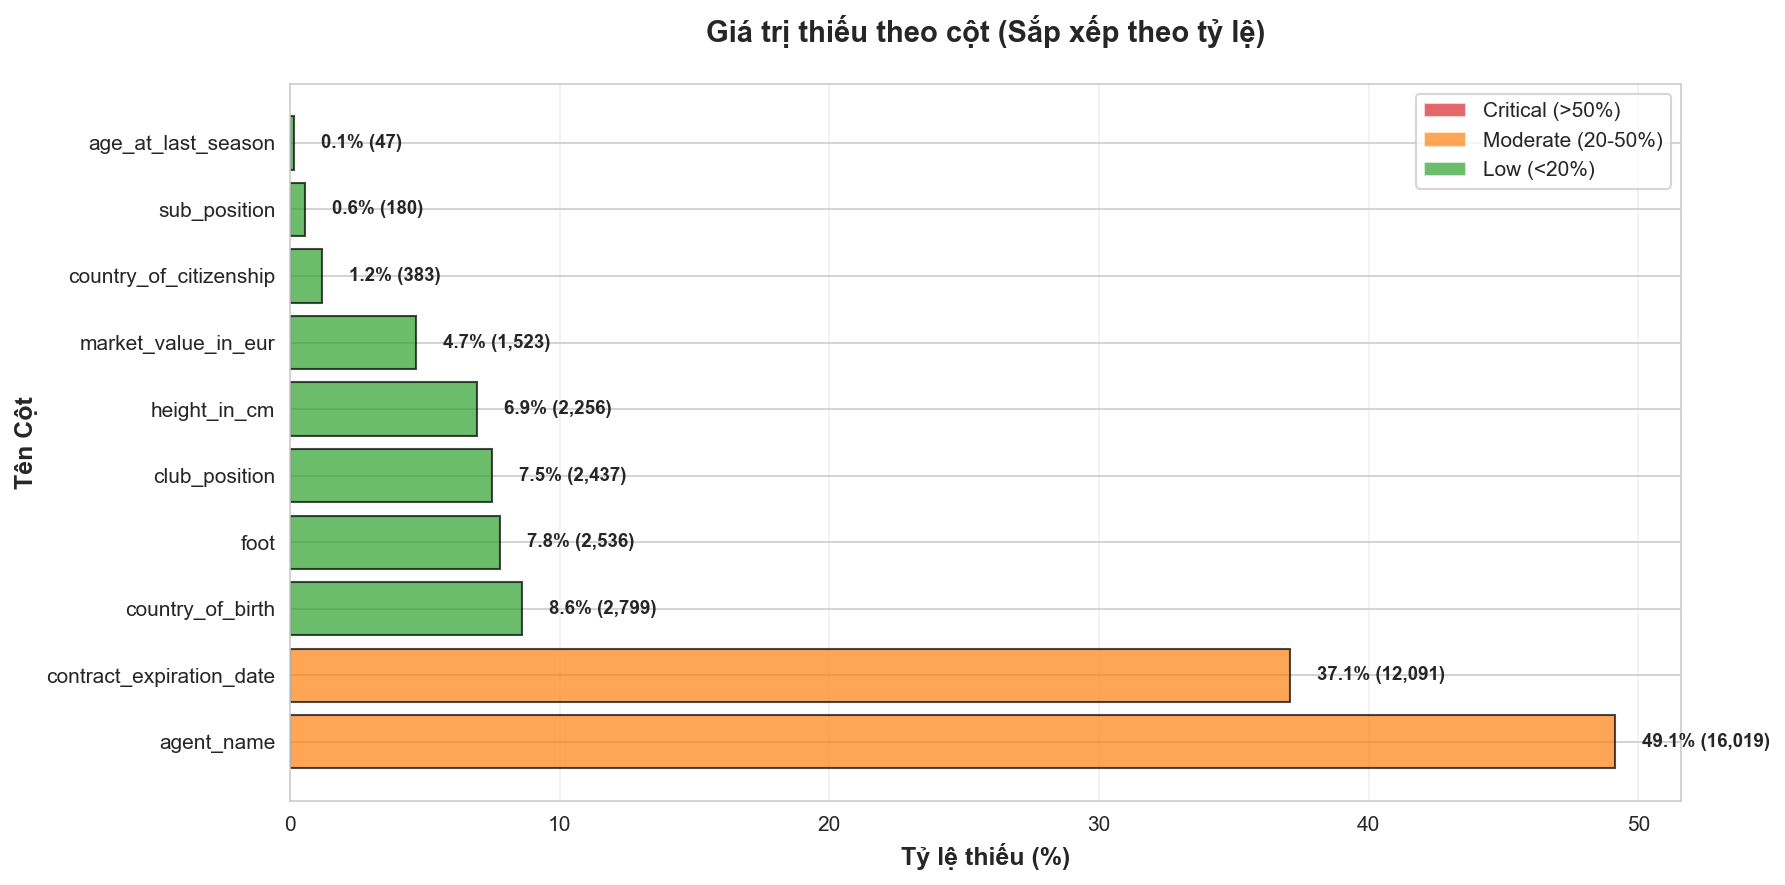

In [31]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=150) # Tăng DPI để ảnh nét hơn

if len(missing_data) > 0:
    # Xác định màu sắc cho các thanh dựa trên tỷ lệ thiếu
    colors = ['#d62728' if x > 50 else '#ff7f0e' if x > 20 else '#2ca02c' 
              for x in missing_data['Missing_Percentage']]
    
    # Vẽ biểu đồ thanh ngang
    bars = ax.barh(missing_data['Column'], missing_data['Missing_Percentage'], 
                   color=colors, alpha=0.7, edgecolor='black')
    
    # Thêm nhãn phần trăm và số lượng cụ thể
    for i, (idx, row) in enumerate(missing_data.iterrows()):
        ax.text(row['Missing_Percentage'] + 1, i, 
                f"{row['Missing_Percentage']:.1f}% ({int(row['Missing_Count']):,})",
                va='center', fontsize=9, fontweight='bold')
    
    # Thiết lập nhãn và tiêu đề
    ax.set_xlabel('Tỷ lệ thiếu (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tên Cột', fontsize=12, fontweight='bold')
    ax.set_title('Giá trị thiếu theo cột (Sắp xếp theo tỷ lệ)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    
    # Thêm chú thích màu sắc
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#d62728', alpha=0.7, label='Critical (>50%)'),
        Patch(facecolor='#ff7f0e', alpha=0.7, label='Moderate (20-50%)'),
        Patch(facecolor='#2ca02c', alpha=0.7, label='Low (<20%)')
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
else:
    # Hiển thị thông báo nếu không có dữ liệu thiếu
    ax.text(0.5, 0.5, 'Không có giá trị thiếu trong Dataset', 
            ha='center', va='center', fontsize=16, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

### **➤ NHẬN XÉT:**

#### **1. Phân tầng mức độ nghiêm trọng (Severity Stratification)**
Biểu đồ cho thấy sự phân hóa rõ rệt về chất lượng dữ liệu giữa các thuộc tính, chia làm 3 nhóm hành động chính:

*   **Nhóm "Cảnh báo cao" (Moderate Impact):**
    *   `agent_name` (49.1%) và `contract_expiration_date` (37.1%) có tỷ lệ khuyết thiếu rất lớn.
    *   **Insight:** Việc `agent_name` thiếu gần một nửa dữ liệu có thể không phải là lỗi thu thập (MCAR) mà mang tính hệ thống (MNAR - Missing Not At Random). Có khả năng cao các cầu thủ này là cầu thủ trẻ, cầu thủ tự do, hoặc thuộc các giải đấu thấp không có người đại diện chuyên nghiệp.
    *   **Giải pháp xử lý đề xuất:** Không nên xóa các dòng này (sẽ mất ~50% dữ liệu) cũng không nên điền bằng Mode. Thay vào đó, nên xử lý bằng **Feature Engineering**: Tạo nhóm mới như *"No Agent"* hoặc biến đổi thành biến nhị phân `has_agent` (0/1). Tương tự với ngày hết hạn hợp đồng, có thể gán giá trị *"Unknown"* hoặc tính toán dựa trên quy luật nếu có.

*   **Nhóm "Nhạy cảm" (Key Variable Impact):**
    *   `market_value_in_eur` (4.7%): Mặc dù tỷ lệ thiếu thấp, nhưng đây thường là biến mục tiêu (Target Variable) hoặc biến quan trọng để phân cụm.
    *   `age_at_last_season` (0.1%): Mặc dù tỷ lệ thiếu thấp, nhưng đây thường là biến quan trọng trong việc dùng vào để train/test model và dự đoán giá trị cầu thủ ở mùa kế tiếp last_season, nếu không có tuổi thì khả năng cao sẽ dựa vào các features khác để cho ra kết quả.
    *   **Giải pháp xử lý đề xuất:** Việc impute (điền giá trị) cho biến mục tiêu có thể đưa nhiễu (bias) vào mô hình. Với tỷ lệ thấp (4.7%), giải pháp an toàn nhất là **loại bỏ (drop)** các dòng này để đảm bảo độ sạch của dữ liệu huấn luyện (Ground Truth), trừ khi ta đang muốn dự đoán chính giá trị này.

*   **Nhóm "Xử lý tiêu chuẩn" (Low Impact):**
    *   Các biến như `country_of_birth` (8.6%), `foot` (7.8%), `height_in_cm` (6.9%) và các biến còn lại.
    *   **Giải pháp xử lý đề xuất:** Sử dụng kỹ thuật điền khuyết cơ bản:
        *   *Biến định lượng (height):* Điền bằng **Mean** hoặc **Median** (kiểm tra phân phối trước).
        *   *Biến định danh (foot, country):* Điền bằng **Mode** hoặc nhóm *"Unknown"*.

#### **2. Kết luận tổng quan**
*   **Không có biến nào thuộc nhóm "Báo động đỏ" (`Critical > 50%`):** Đây là một ưu điểm lớn về chất lượng dữ liệu. Trong quy trình Data Science, các biến thiếu trên 50% thường bị loại bỏ (drop) ngay lập tức vì việc khôi phục (imputation) sẽ tạo ra quá nhiều dữ liệu giả, làm sai lệch mô hình. Việc không có cột nào rơi vào nhóm này đồng nghĩa với việc **ta có thể giữ lại toàn bộ các trường thông tin (features)** để phục vụ phân tích mà không cần cắt bỏ bất kỳ đặc trưng nào của cầu thủ.
*   **Tính phản ánh thực tế (Domain Reality):** Sự thiếu hụt tập trung ở nhóm `Moderate (20-50%)` thay vì rải rác ngẫu nhiên phản ánh đúng đặc thù của bóng đá: các thông tin về kỹ thuật/thể chất (chiều cao, chân thuận) dễ quan sát nên rất đầy đủ (nhóm `Low`), trong khi thông tin thương mại (hợp đồng, người đại diện) thường mang tính bảo mật hoặc không tồn tại ở các cầu thủ cấp thấp. Do đó, dữ liệu này đủ "sạch" và "thật" để xây dựng các mô hình định giá.

**Chiến lược tiền xử lý (Preprocessing Strategy):**
1.  **Giữ lại và gán nhãn** cho nhóm thương mại.
2.  **Loại bỏ dòng thiếu** ở biến mục tiêu.
3.  **Điền giá trị** cho các thuộc tính thể chất.


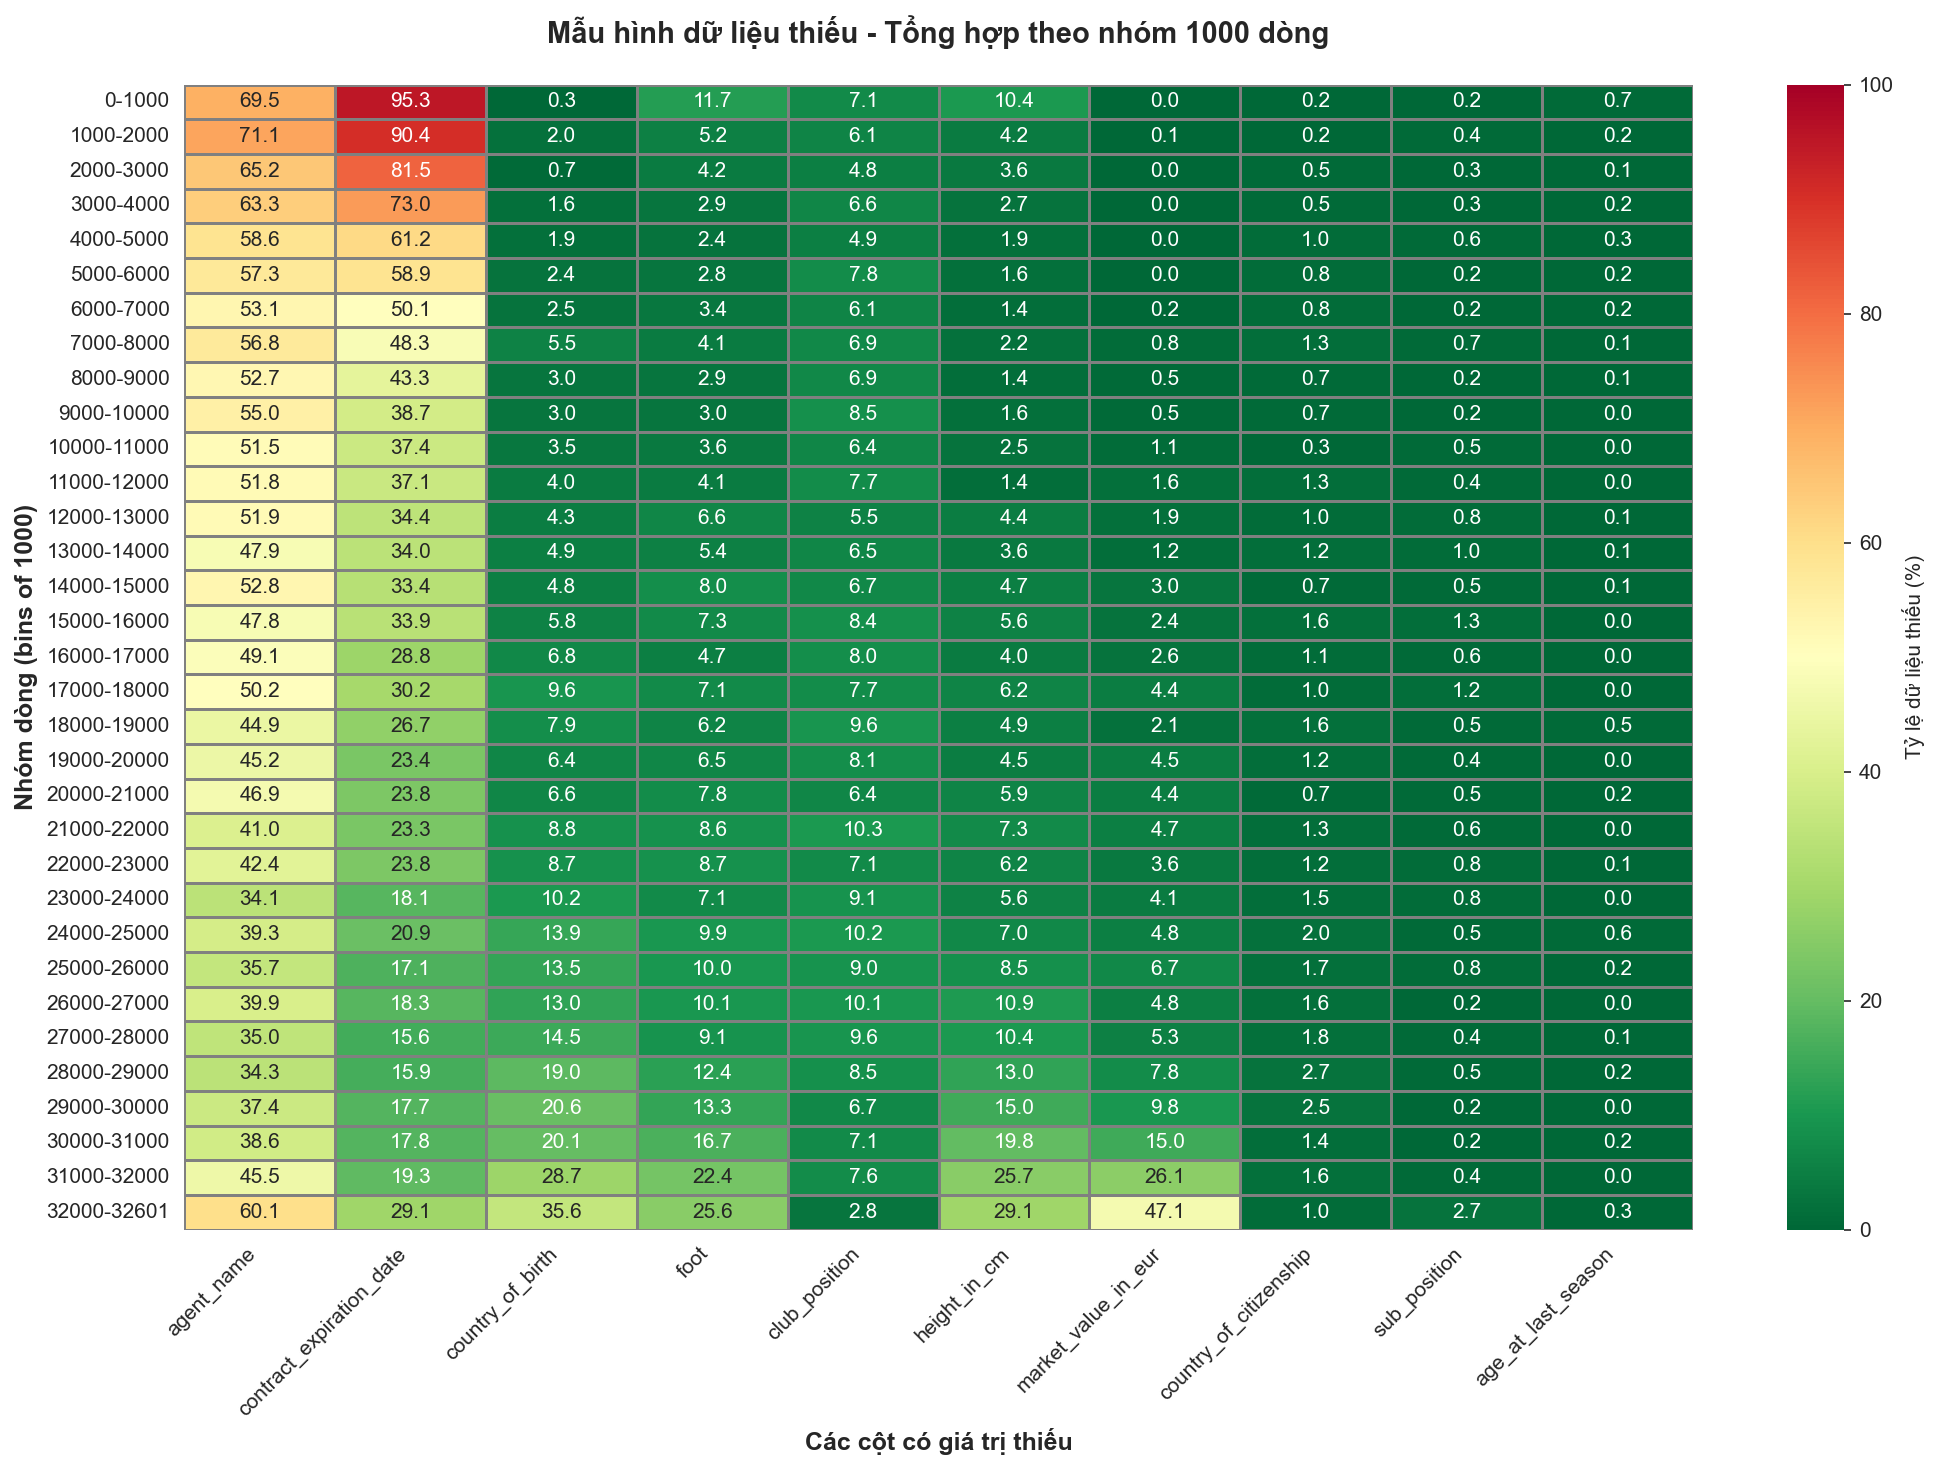

In [45]:
# Heatmap (Bản đồ nhiệt) dữ liệu khuyết thiếu

if len(missing_data) > 0:
    missing_cols = missing_data['Column'].tolist()
    
    # Tạo các nhóm (bin) cho các dòng (ví dụ: mỗi 50 dòng)
    bin_size = 1000
    n_bins = len(df) // bin_size + (1 if len(df) % bin_size != 0 else 0)
    
    # Tính toán tỷ lệ khuyết thiếu cho mỗi nhóm (bin)
    aggregated_missing = []
    bin_labels = []
    
    for i in range(n_bins):
        start_idx = i * bin_size
        end_idx = min((i + 1) * bin_size, len(df))
        
        # Tính toán tỷ lệ phần trăm giá trị thiếu trong nhóm này cho mỗi cột
        bin_missing = df[missing_cols].iloc[start_idx:end_idx].isnull().mean() * 100
        aggregated_missing.append(bin_missing)
        bin_labels.append(f"{start_idx}-{end_idx}")
    
    # Chuyển đổi sang DataFrame
    aggregated_df = pd.DataFrame(aggregated_missing, 
                                 columns=missing_cols,
                                 index=bin_labels)
    
    # Tạo hình ảnh
    fig, ax = plt.subplots(figsize=(14, max(8, n_bins * 0.3)), dpi = 150)
    
    # Tạo heatmap với bảng màu tốt hơn
    sns.heatmap(aggregated_df, 
                cmap='RdYlGn_r',  # Đỏ cho tỷ lệ thiếu cao, Xanh cho tỷ lệ thấp
                annot=True,  # Hiển thị phần trăm
                fmt='.1f',  # Một chữ số thập phân
                cbar_kws={'label': 'Tỷ lệ dữ liệu thiếu (%)'},
                linewidths=0.5,
                linecolor='gray',
                vmin=0,
                vmax=100,
                ax=ax)
    
    ax.set_title(f'Mẫu hình dữ liệu thiếu - Tổng hợp theo nhóm {bin_size} dòng', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Các cột có giá trị thiếu', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'Nhóm dòng (bins of {bin_size})', fontsize=12, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

else:
    print("Không có giá trị thiếu để trực quan hóa!")

### **➤ NHẬN XÉT:**

#### **1. Chất lượng dữ liệu theo nhóm thuộc tính (Attribute Clusters)**
Biểu đồ Heatmap cho thấy một sự phân chia rõ ràng về chất lượng dữ liệu dựa trên tính chất của thông tin cầu thủ:

*   **Nhóm "Hồ sơ cơ bản" (Core Player Profile):**
    *   Các cột như `age_at_last_season`, `sub_position`, `country_of_citizenship` có độ phủ dữ liệu rất cao (màu xanh chiếm ưu thế).
    *   **Insight:** Đây là những thông tin định danh cơ bản luôn có sẵn trên các nền tảng như Transfermarkt. Sự đầy đủ này rất quan trọng vì `Age` và `sub_position` là hai yếu tố then chốt để phân nhóm cầu thủ (ví dụ: so sánh tiền đạo 23 tuổi với tiền đạo 30 tuổi) trong các bài toán định giá hoặc tìm kiếm tài năng.

*   **Nhóm "Thể chất & Kỹ thuật" (Physical & Technical):**
    *   Các cột `height_in_cm`, `foot` có mức độ thiếu dữ liệu vừa phải (các vạch đỏ xuất hiện rải rác).
    *   **Insight:** Trong bóng đá hiện đại, `foot` (chân thuận) ảnh hưởng lớn đến vị trí thi đấu (ví dụ: Inverted Winger cần chân nghịch) và chiến thuật. Dữ liệu thiếu ở đây có thể làm giảm độ chính xác của các mô hình gợi ý vị trí tối ưu. `height_in_cm` đặc biệt quan trọng với các vị trí như Trung vệ (Centre-Back) hay Thủ môn, việc thiếu dữ liệu này cần được xử lý cẩn thận (impute theo vị trí thi đấu thay vì trung bình toàn bộ).

*   **Nhóm "Thương mại & Hợp đồng" (Commercial & Contractual):**
    *   `agent_name` và `contract_expiration_date` có mật độ thiếu dữ liệu dày đặc nhất (nhiều vạch đỏ).
    *   **Insight:** Trong thị trường chuyển nhượng, việc không có `agent_name` thường ám chỉ cầu thủ này tự đại diện (người nhà) hoặc thuộc các giải đấu thấp, dữ liệu chưa được cập nhật. Điều này có thể là một *"proxy variable"* (biến đại diện) cho mức độ chuyên nghiệp hoặc độ nổi tiếng của cầu thủ. `contract_expiration_date` thiếu gây khó khăn cho việc dự đoán khả năng chuyển nhượng tự do (free transfer), một yếu tố quan trọng trong scouting.

#### **2. Mẫu hình khuyết thiếu (Pattern of Missingness)**
*   Có vẻ như sự thiếu hụt dữ liệu không hoàn toàn ngẫu nhiên (**Not MCAR**).
*   Ví dụ: Các dòng thiếu `market_value_in_eur` thường cũng thiếu `contract_expiration_date` hoặc `agent_name`.
*   **Insight:** Điều này gợi ý rằng các cầu thủ thiếu dữ liệu này có thể thuộc nhóm cầu thủ trẻ (chưa có định giá, chưa có hợp đồng chuyên nghiệp dài hạn) hoặc cầu thủ ở các giải đấu ít được quan tâm hơn. Nếu chúng ta loại bỏ (drop) các dòng này, mô hình sẽ bị thiên lệch (**bias**) về phía các cầu thủ nổi tiếng/giải đấu lớn.

#### **3. Chiến lược đề xuất (Actionable Recommendations)**
*   **Với `market_value_in_eur`:** Đây là biến mục tiêu quan trọng. Thay vì impute (dễ gây sai lệch lớn), nên xem xét tách tập dữ liệu: một tập có giá trị thị trường để huấn luyện mô hình định giá, và một tập không có để dùng mô hình đó dự đoán (nếu mục tiêu là tìm "hidden gems").
*   **Với `agent_name`:** Chuyển đổi thành biến phân loại: *"Top Agent"* (nếu thuộc các công ty lớn), *"Known Agent"*, và *"Unknown/None"*.
*   **Với `foot` & `height`:** Sử dụng `sub_position` để điền giá trị thiếu (ví dụ: chiều cao trung bình của Trung vệ sẽ khác với Tiền vệ cánh).


#### 7.3. Phân tích Mẫu hình Dữ liệu Khuyết thiếu

In [33]:
# Phân tích Mẫu hình Dữ liệu Khuyết thiếu
print("=" * 80)
print("PHÂN TÍCH MẪU HÌNH DỮ LIỆU KHUYẾT THIẾU")
print("=" * 80)

if len(missing_data) > 0:
    # Kiểm tra xem giá trị khuyết thiếu có tập trung ở các dòng cụ thể không
    rows_with_missing = df.isnull().any(axis=1).sum()
    rows_multiple_missing = (df.isnull().sum(axis=1) > 1).sum()
    
    print(f"\n Phân tích theo dòng:")
    print(f"   • Số dòng có ít nhất 1 giá trị thiếu: {rows_with_missing:,} ({rows_with_missing/len(df)*100:.2f}%)")
    print(f"   • Số dòng có từ 2 giá trị thiếu trở lên: {rows_multiple_missing:,} ({rows_multiple_missing/len(df)*100:.2f}%)")
    print(f"   • Số dòng có đầy đủ tất cả giá trị: {len(df) - rows_with_missing:,} ({(len(df)-rows_with_missing)/len(df)*100:.2f}%)")
    
    # Kiểm tra sự tương quan của dữ liệu khuyết thiếu
    print(f"\nTương quan dữ liệu khuyết thiếu:")
    missing_cols = missing_data['Column'].tolist()
    
    if len(missing_cols) >= 2:
        # Tạo ma trận tương quan của các chỉ báo khuyết thiếu
        missing_corr = df[missing_cols].isnull().astype(int).corr()
        
        # Tìm các cặp tương quan cao (loại trừ đường chéo)
        high_corr_pairs = []
        for i in range(len(missing_corr.columns)):
            for j in range(i+1, len(missing_corr.columns)):
                if abs(missing_corr.iloc[i, j]) > 0.5:
                    high_corr_pairs.append({
                        'Column_1': missing_corr.columns[i],
                        'Column_2': missing_corr.columns[j],
                        'Correlation': missing_corr.iloc[i, j]
                    })
        
        if high_corr_pairs:
            print("\n   Các cột có mẫu hình khuyết thiếu tương quan (|tương quan| > 0.5):")
            for pair in high_corr_pairs:
                print(f"   • {pair['Column_1']} <--> {pair['Column_2']}: {pair['Correlation']:.3f}")
        else:
            print("Không tìm thấy tương quan mạnh giữa các mẫu hình giá trị khuyết thiếu")
    
    # Kiểm tra số lượng giá trị thiếu tối đa trong một dòng
    max_missing_per_row = df.isnull().sum(axis=1).max()
    print(f"\nSố lượng giá trị thiếu tối đa trong một dòng: {max_missing_per_row} cột")
    
else:
    print("\n Không có giá trị thiếu để phân tích!")

PHÂN TÍCH MẪU HÌNH DỮ LIỆU KHUYẾT THIẾU

 Phân tích theo dòng:
   • Số dòng có ít nhất 1 giá trị thiếu: 22,424 (68.78%)
   • Số dòng có từ 2 giá trị thiếu trở lên: 11,631 (35.68%)
   • Số dòng có đầy đủ tất cả giá trị: 10,177 (31.22%)

Tương quan dữ liệu khuyết thiếu:

   Các cột có mẫu hình khuyết thiếu tương quan (|tương quan| > 0.5):
   • foot <--> height_in_cm: 0.517

Số lượng giá trị thiếu tối đa trong một dòng: 8 cột


### 8. Mối quan hệ và Tương quan (Relationships & Correlations)

Phần này khám phá mối quan hệ tuyến tính giữa các biến số thông qua ma trận tương quan Pearson. Việc này giúp xác định các biến có mối liên hệ mạnh mẽ với nhau và đặc biệt là với biến mục tiêu (nếu có), hữu ích cho việc lựa chọn đặc trưng.

Ma trận tương quan được tính toán cho tất cả các cột kiểu số.

#### 8.1. Phân tích tương quan các biến số

In [34]:
# Ma trận tương quan (Correlation Matrix) cho các biến số
print("=" * 80)
print("PHÂN TÍCH TƯƠNG QUAN - CÁC BIẾN SỐ")
print("=" * 80)

# Chỉ chọn các cột có kiểu dữ liệu số
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nTìm thấy {len(numerical_cols)} cột số để phân tích tương quan (correlation analysis)")

if len(numerical_cols) >= 2:
    # Tính toán ma trận tương quan
    correlation_matrix = df[numerical_cols].corr()
    
    # Hiển thị thông tin ma trận
    print("\nKích thước ma trận tương quan (Correlation Matrix):", correlation_matrix.shape)
    print(f"   Đang phân tích {len(numerical_cols)} biến số.")

else:
    print("\nCần ít nhất 2 cột số để thực hiện phân tích tương quan.")


PHÂN TÍCH TƯƠNG QUAN - CÁC BIẾN SỐ

Tìm thấy 10 cột số để phân tích tương quan (correlation analysis)

Kích thước ma trận tương quan (Correlation Matrix): (10, 10)
   Đang phân tích 10 biến số.


#### 8.2. Correlation Heatmap - Ma trận tương quan đầy đủ

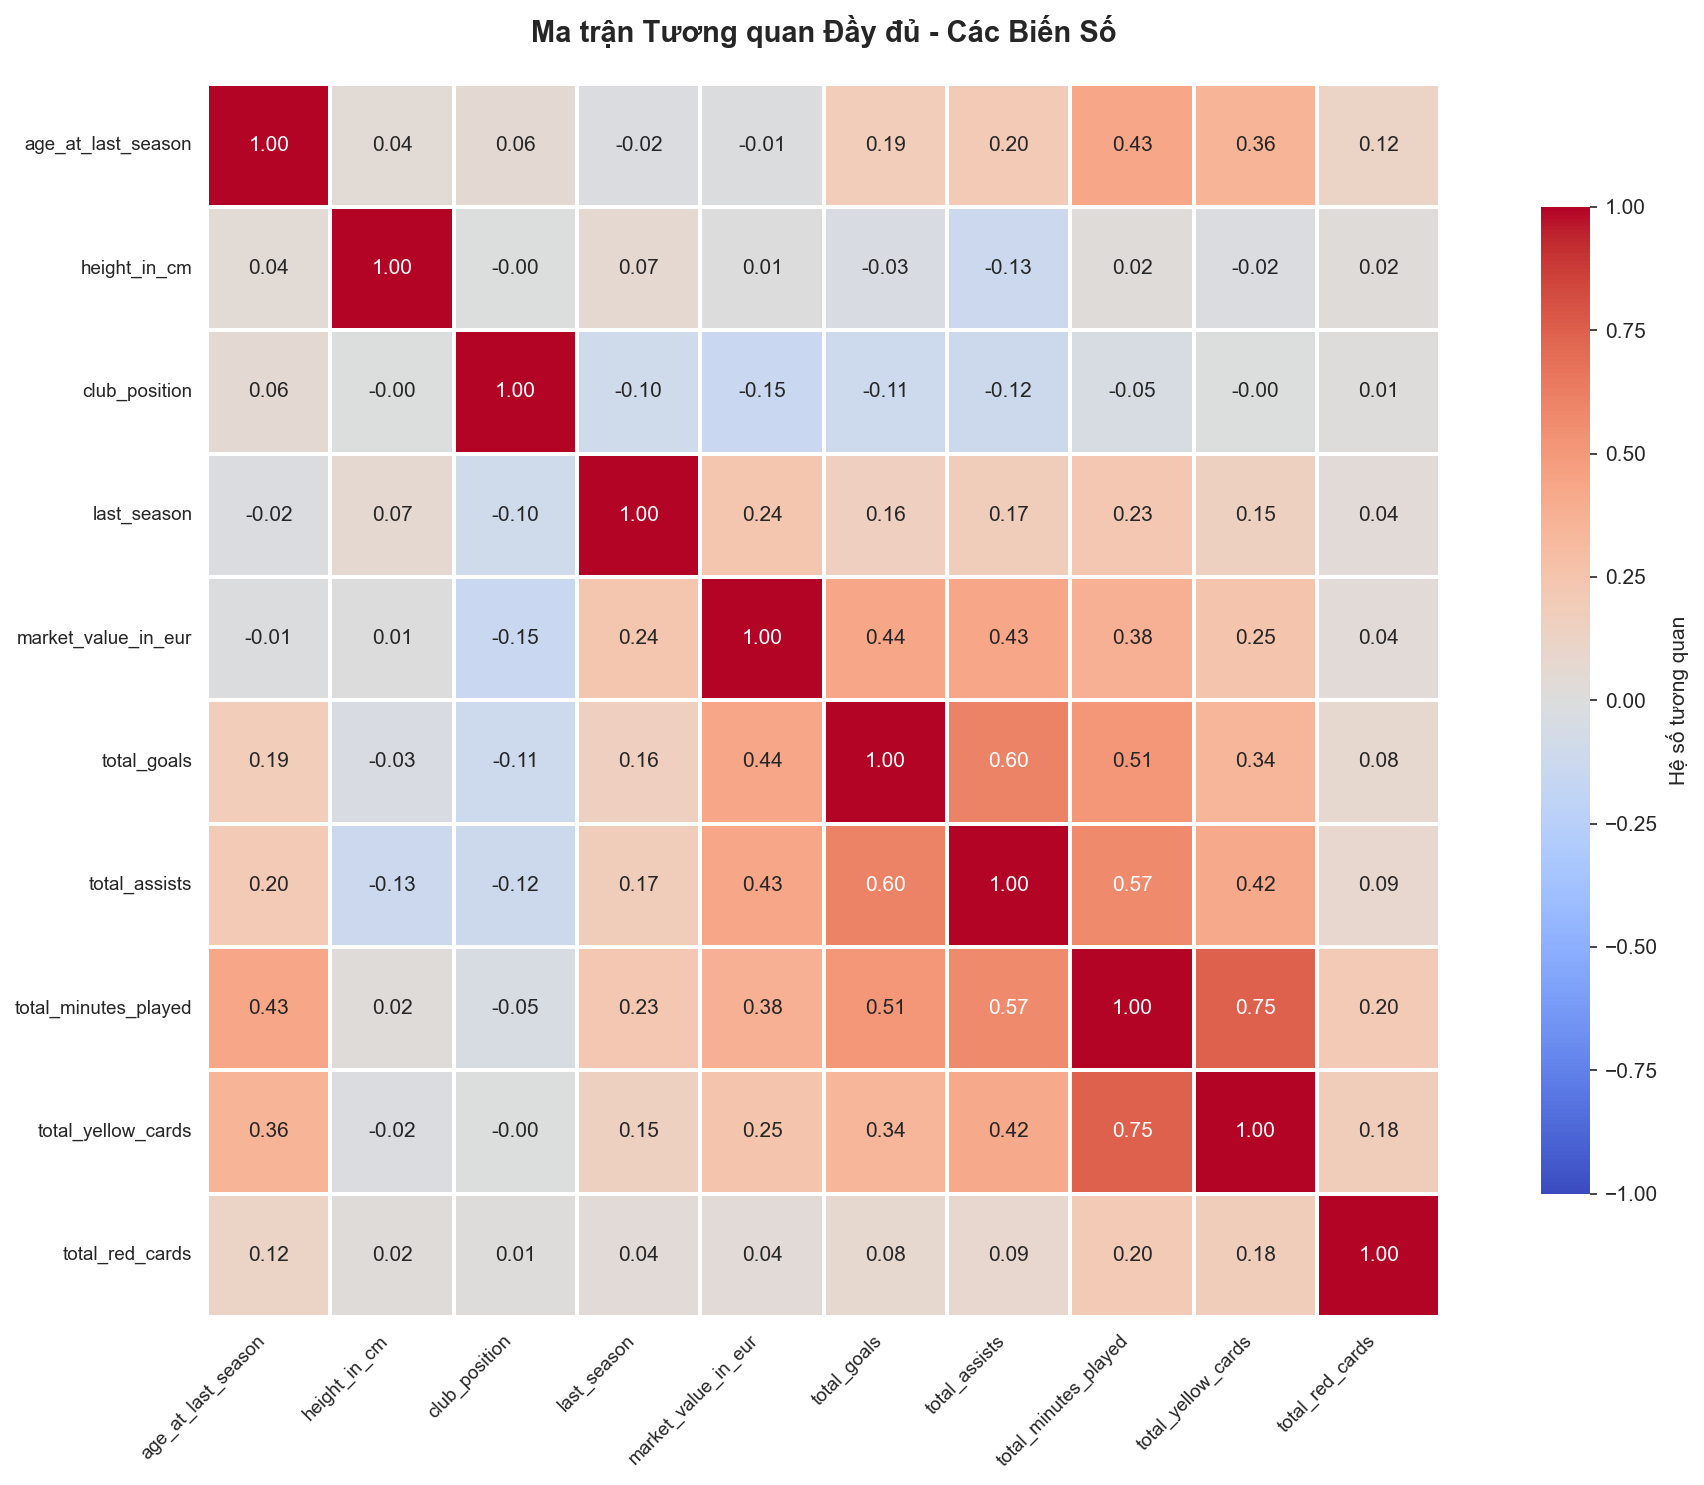

In [35]:
# Correlation Heatmap - Ma trận tương quan đầy đủ
if len(numerical_cols) >= 2:
    fig, ax = plt.subplots(figsize=(14, 10), dpi=150)  # Tăng kích thước figure
    
    # Vẽ heatmap đầy đủ (không dùng mask)
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt='.2f',
                cmap='coolwarm',
                center=0,
                square=True,
                linewidths=1,
                cbar_kws={"shrink": 0.8, "label": "Hệ số tương quan"},
                vmin=-1, 
                vmax=1,
                ax=ax)
    
    ax.set_title('Ma trận Tương quan Đầy đủ - Các Biến Số', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Xoay nhãn trục x để dễ đọc hơn và căn chỉnh
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    
    plt.tight_layout()  # Tự động điều chỉnh layout để tránh bị cắt
    plt.show()
else:
    print("Cần ít nhất 2 biến số để vẽ ma trận tương quan.")


### **➤ NHẬN XÉT & PHÂN TÍCH TƯƠNG QUAN (CORRELATION ANALYSIS)**

#### **1. "End Product" là Vua trong định giá (Market Value Drivers)**
*   **Quan sát:** Biến `market_value_in_eur` có tương quan dương mạnh nhất với `total_goals` (**0.44**) và `total_assists` (**0.43**), cao hơn nhiều so với các yếu tố khác như `last_season` hay `height`.
*   **Insight:** Thị trường chuyển nhượng luôn ưu ái "đầu ra" (output) cụ thể. Cầu thủ trực tiếp tham gia vào bàn thắng (G/A) luôn được định giá cao hơn những cầu thủ đóng góp thầm lặng (như đánh chặn hay luân chuyển bóng - *Pre-assists*).
*   **Đánh giá:** Khi xây dựng mô hình dự đoán giá, **Goals** và **Assists** là những feature quan trọng nhất (*Top Feature Importance*).

#### **2. Vấn đề Đa cộng tuyến (Multicollinearity Alert)**
*   **Quan sát:** Có một cụm tương quan rất mạnh giữa các biến hiệu suất:
    *   `total_goals` vs `total_assists`: **0.60**
    *   `total_minutes_played` vs `total_goals` (**0.51**) và `total_assists` (**0.57**)
*   **Insight:** Điều này là logic hiển nhiên: Cầu thủ được ra sân nhiều (`minutes_played` cao) thì mới có cơ hội ghi bàn và kiến tạo nhiều. Ngược lại, cầu thủ giỏi (ghi bàn nhiều) thì HLV mới cho đá nhiều.
*   **Rủi ro DS:** Việc các biến độc lập tương quan mạnh với nhau (**Đa cộng tuyến**) có thể làm nhiễu mô hình hồi quy tuyến tính, khiến việc xác định tầm quan trọng của từng yếu tố trở nên khó khăn (trọng số bị sai lệch).
*   **Giải pháp (Feature Engineering):** Thay vì dùng số tổng (`total_`), hãy chuyển sang dùng chỉ số trung bình trận (**Per 90 metrics**).
    *   *Ví dụ:* `Goals_per_90`, `Assists_per_90`.
    *   Điều này sẽ loại bỏ yếu tố "thời gian thi đấu" và đánh giá chính xác hiệu suất thực tế (Efficiency).

#### **3. Thẻ phạt là "chi phí" của thời gian thi đấu**
*   **Quan sát:** `total_yellow_cards` có tương quan cực mạnh với `total_minutes_played` (**0.75**).
*   **Insight:** Thẻ vàng chủ yếu là một hàm số của thời gian thi đấu (đá càng nhiều càng dễ ăn thẻ), chứ không hẳn phản ánh lối chơi bạo lực. Tuy nhiên, `total_red_cards` lại có tương quan thấp hơn nhiều (**0.20**), cho thấy thẻ đỏ là những sự kiện ngẫu nhiên hoặc kỷ luật cá nhân, ít phụ thuộc vào thời gian thi đấu hơn.

#### **4. Cảnh báo về biến `club_position` (Data Trap)**
*   **Quan sát:** Bạn đã đưa biến `club_position` vào ma trận tương quan (hệ số 0.06, -0.10...).
*   **Cảnh báo Đỏ:** Trong dataset gốc, `club_position` thường là dạng chữ (ST, CB, GK...). Để đưa vào heatmap, có vẻ nó đã được mã hóa thành số (*Label Encoding*: ví dụ GK=1, CB=2, ST=10...).
*   **Insight:** Việc tính tương quan Pearson cho biến này là **vô nghĩa về mặt toán học**. Máy tính sẽ hiểu sai rằng vị trí ST (số 10) "lớn hơn" vị trí GK (số 1), dẫn đến các mối tương quan giả tạo.
*   **Hành động:** Loại bỏ `club_position` khỏi ma trận tương quan số. Khi mô hình hóa, hãy sử dụng **One-Hot Encoding** (tạo cột riêng cho từng vị trí) hoặc phân tích riêng từng nhóm vị trí (Stratified Analysis).

#### **5. Tuổi tác và Hiệu suất tích lũy**
*   **Quan sát:** `age_at_last_season` có tương quan dương với `total_minutes_played` (**0.43**) và `total_yellow_cards` (**0.36**).
*   **Insight:** Điều này xác nhận rằng các biến `total_` trong biểu đồ này có khả năng là số liệu tích lũy cả sự nghiệp (*Career Stats*) chứ không phải một mùa giải. Cầu thủ càng lớn tuổi, tích lũy số phút và thẻ phạt càng nhiều.
*   **Kết luận quan trọng:** Nếu đây là số liệu tích lũy, việc `Age` không tương quan với `Market Value` (-0.01) càng hợp lý: Một lão tướng có tổng số bàn thắng cả đời rất cao nhưng giá trị thị trường lại thấp vì sắp giải nghệ.

### **➤ KẾT LUẬN**

1.  **Chuyển đổi dữ liệu:** Cần tạo ra các biến **Per 90** (hiệu suất/90 phút) để loại bỏ nhiễu từ việc ra sân nhiều hay ít.
2.  **Xử lý biến phân loại:** Không dùng Label Encoding cho Position để tính tương quan. Hãy tách data theo vị trí (ví dụ: chỉ phân tích Tiền đạo để xem mối quan hệ Goal-Value mạnh đến mức nào).
3.  **Mục tiêu mô hình:** Dùng **Goals** và **Assists** làm động lực chính để dự đoán giá, nhưng cần thêm các chỉ số phụ (tuổi, giải đấu, thời hạn hợp đồng) để tinh chỉnh độ chính xác.


#### 8.3. Phân tích các cặp tương quan mạnh

In [36]:
# Phân tích các cặp tương quan mạnh
if len(numerical_cols) >= 2:
    print("=" * 80)
    print("CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH")
    print("=" * 80)
    
    # Tìm các cặp tương quan mạnh (loại trừ đường chéo)
    strong_correlations = []
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) >= 0.5:  # Ngưỡng cho tương quan "mạnh"
                strong_correlations.append({
                    'Variable_1': correlation_matrix.columns[i],
                    'Variable_2': correlation_matrix.columns[j],
                    'Correlation': corr_value,
                    'Strength': 'Rất mạnh' if abs(corr_value) >= 0.8 else 'Mạnh',
                    'Direction': 'Thuận' if corr_value > 0 else 'Nghịch'
                })
    
    if strong_correlations:
        # Sắp xếp theo giá trị tuyệt đối của correlation
        strong_correlations = sorted(strong_correlations, 
                                    key=lambda x: abs(x['Correlation']), 
                                    reverse=True)
        
        print(f"\nTìm thấy {len(strong_correlations)} cặp biến có tương quan mạnh (|r| ≥ 0.5):\n")
        
        for idx, corr in enumerate(strong_correlations, 1):
            symbol = "📈" if corr['Direction'] == 'Thuận' else "📉"
            print(f"{idx}. {symbol} {corr['Variable_1']} <--> {corr['Variable_2']}")
            print(f"   Hệ số tương quan: {corr['Correlation']:.3f} (Tương quan {corr['Strength']} {corr['Direction']})")
            print()
    else:
        print("\n Không tìm thấy cặp biến nào có tương quan mạnh (|r| ≥ 0.5)")
        print("   Tất cả các biến số tương đối độc lập với nhau")

CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH

Tìm thấy 4 cặp biến có tương quan mạnh (|r| ≥ 0.5):

1. 📈 total_minutes_played <--> total_yellow_cards
   Hệ số tương quan: 0.748 (Tương quan Mạnh Thuận)

2. 📈 total_goals <--> total_assists
   Hệ số tương quan: 0.604 (Tương quan Mạnh Thuận)

3. 📈 total_assists <--> total_minutes_played
   Hệ số tương quan: 0.574 (Tương quan Mạnh Thuận)

4. 📈 total_goals <--> total_minutes_played
   Hệ số tương quan: 0.510 (Tương quan Mạnh Thuận)



#### 8.4. Phân tích cặp tương quan `age_at_last_season` và `market_value_in_eur`

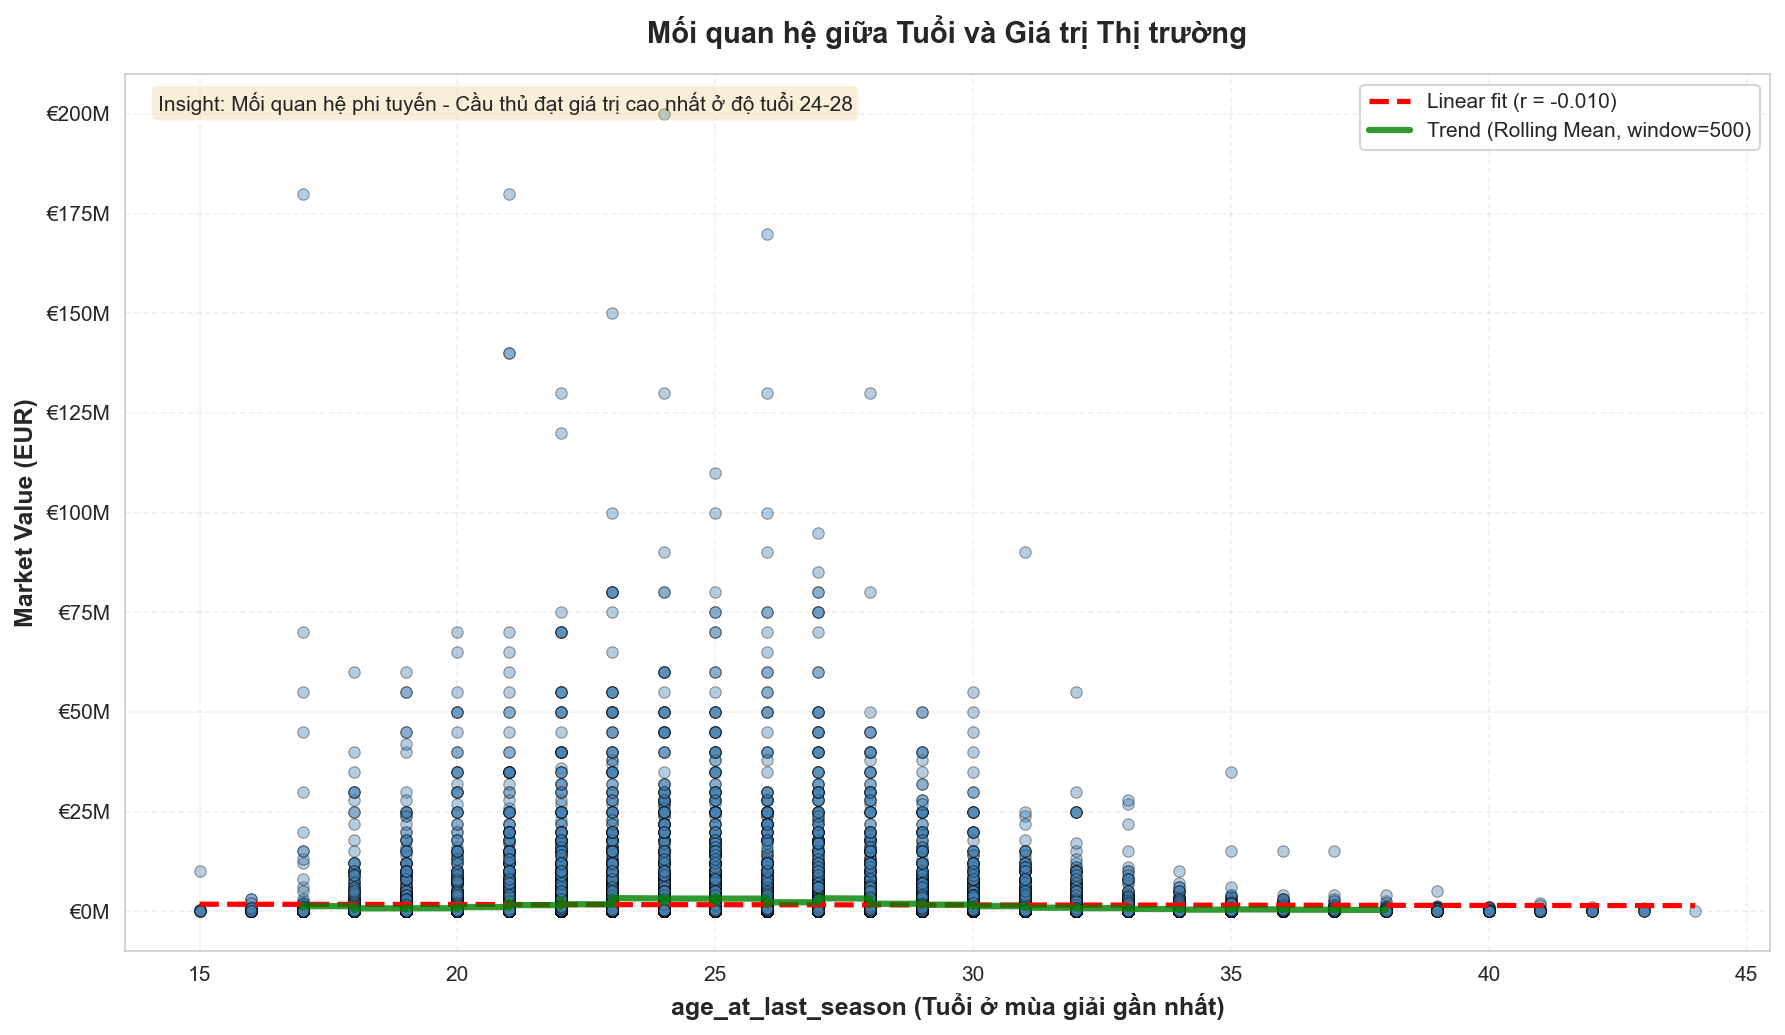

PHÂN TÍCH CHI TIẾT: AGE_AT_LAST_SEASON vs MARKET_VALUE_IN_EUR

Hệ số tương quan Pearson: -0.0098

Giá trị trung bình theo nhóm tuổi:
           Count  Mean_Value  Median_Value    Max_Value
age_group                                              
16-20       4833   724935.00     100000.00 180000000.00
21-24       9095  1754660.00     225000.00 180000000.00
25-28       7051  2800394.00     400000.00 200000000.00
29-32       5826  1567953.00     300000.00 130000000.00
33-40       4151   620901.00     225000.00  55000000.00
40+           81   237963.00     100000.00   2000000.00

 Nhóm tuổi có giá trị TB cao nhất: 25-28 (€2,800,394)


In [37]:
# Scatter plot cho tương quan giữa age_at_last_season và market_value_in_eur
fig, ax = plt.subplots(figsize=(12, 7), dpi=150)

# Loại bỏ giá trị NaN để vẽ chính xác
temp_df = df[['age_at_last_season', 'market_value_in_eur']].dropna()
x_data = temp_df['age_at_last_season']
y_data = temp_df['market_value_in_eur']

# Vẽ scatter plot
ax.scatter(x_data, y_data, alpha=0.4, s=30, c='steelblue', edgecolors='black', linewidth=0.5)

# Thêm đường hồi quy tuyến tính
z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
x_line = np.linspace(x_data.min(), x_data.max(), 100)
ax.plot(x_line, p(x_line), "r--", linewidth=2.5, label=f'Linear fit (r = {df[["age_at_last_season", "market_value_in_eur"]].corr().iloc[0,1]:.3f})')

# Thêm đường trung bình động (moving average) để thấy xu hướng phi tuyến
age_sorted = temp_df.sort_values('age_at_last_season')
window_size = 500
rolling_mean = age_sorted['market_value_in_eur'].rolling(window=window_size, center=True).mean()
ax.plot(age_sorted['age_at_last_season'], rolling_mean, color='green', linewidth=3, 
    label=f'Trend (Rolling Mean, window={window_size})', alpha=0.8)

# Thiết lập nhãn và tiêu đề
ax.set_xlabel('age_at_last_season (Tuổi ở mùa giải gần nhất)', fontsize=12, fontweight='bold')
ax.set_ylabel('Market Value (EUR)', fontsize=12, fontweight='bold')
ax.set_title('Mối quan hệ giữa Tuổi và Giá trị Thị trường', 
         fontsize=14, fontweight='bold', pad=15)

# Định dạng trục y với ký hiệu triệu
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1e6:.0f}M'))

# Thêm lưới và chú thích
ax.grid(alpha=0.3, linestyle='--')
ax.legend(loc='upper right', fontsize=10)

# Thêm annotation cho insight
ax.text(0.02, 0.98, 
    'Insight: Mối quan hệ phi tuyến - Cầu thủ đạt giá trị cao nhất ở độ tuổi 24-28',
    transform=ax.transAxes, fontsize=10, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# In thống kê bổ sung
print("=" * 80)
print("PHÂN TÍCH CHI TIẾT: AGE_AT_LAST_SEASON vs MARKET_VALUE_IN_EUR")
print("=" * 80)

print(f"\nHệ số tương quan Pearson: {df[['age_at_last_season', 'market_value_in_eur']].corr().iloc[0,1]:.4f}")

# Phân tích theo nhóm tuổi
age_bins = [16, 20, 24, 28, 32, 40, 60]
age_labels = ['16-20', '21-24', '25-28', '29-32', '33-40', '40+']
temp_df['age_group'] = pd.cut(temp_df['age_at_last_season'], bins=age_bins, labels=age_labels, right=False)

age_group_stats = temp_df.groupby('age_group')['market_value_in_eur'].agg([
    ('Count', 'count'),
    ('Mean_Value', 'mean'),
    ('Median_Value', 'median'),
    ('Max_Value', 'max')
]).round(0)

print("\nGiá trị trung bình theo nhóm tuổi:")
print(age_group_stats)

# Tìm nhóm tuổi có giá trị cao nhất
peak_age_group = age_group_stats['Mean_Value'].idxmax()
peak_value = age_group_stats['Mean_Value'].max()
print(f"\n Nhóm tuổi có giá trị TB cao nhất: {peak_age_group} (€{peak_value:,.0f})")

### **➤ NHẬN XÉT:**

#### 1. Cạm bẫy của "Trung bình" và Hiện tượng Phương sai không đồng nhất (Heteroscedasticity)
Nhìn vào vùng tuổi **17-23**, độ phân tán dữ liệu cực lớn (từ vài trăm nghìn đến gần 200 triệu Euro).

*   **Insight:** Ở độ tuổi này, thị trường không trả tiền cho khả năng hiện tại (*Current Ability*) mà trả tiền cho kỳ vọng tương lai (*Projected Potential*). Sự chênh lệch khổng lồ giữa các điểm dữ liệu phản ánh sự phân hóa giữa các **"Wonderkids"** (những ngoại lệ - outliers phía trên) và các cầu thủ trẻ dạng tiềm năng trung bình.
*   **Hành động cho Data Team:** Khi xây dựng model định giá (*Valuation Model*), chúng ta không thể dùng một mô hình hồi quy tuyến tính đơn giản. Cần bổ sung các biến phái sinh (*feature engineering*) như `minutes_played_u21` (số phút thi đấu ở cấp độ trẻ) hay `international_caps` (số lần khoác áo tuyển) để giải thích tại sao cùng 19 tuổi nhưng giá trị lại chênh nhau cả trăm lần. Nếu không, mô hình sẽ dự đoán sai lệch rất lớn ở phân khúc này.

#### 2. Sự "Vô dụng" của Đường Tuyến tính và Bài toán Hợp đồng
Đường nét đứt màu đỏ ($r \approx 0$) cho thấy tuổi tác không có quan hệ tuyến tính với giá tiền.

*   **Insight:** Giá trị cầu thủ tuân theo quy luật **Parabol lệch**. Đỉnh cao giá trị (*Peak Market Value*) thường đến trước đỉnh cao phong độ (*Peak Performance*). Đỉnh giá trị nằm ở khoảng **24-26 tuổi**, trong khi đỉnh phong độ có thể kéo dài tới 28-29.
*   **Chiến lược CLB:** Đây là cơ sở cho chiến lược **"Bán khi được giá nhất"**. Nếu CLB bán cầu thủ ở tuổi 26 (ngay đỉnh đường xanh lá), chúng ta thu về lợi nhuận tối đa trước khi biểu đồ bắt đầu đi xuống dốc đứng, dù cầu thủ đó vẫn còn đóng góp tốt về mặt chuyên môn trong 2-3 năm nữa. Đây là cách các CLB như *Benfica* hay *Dortmund* vận hành cực giỏi.

#### 3. Thiên kiến kẻ sống sót (Survivorship Bias) ở độ tuổi 32+
Khu vực bên phải biểu đồ (**32-40 tuổi**) có mật độ điểm rất thưa thớt và chủ yếu nằm sát đáy, nhưng vẫn có vài điểm lơ lửng giá cao.

*   **Insight:** Những chấm dữ liệu còn tồn tại ở cột mốc 35+ tuổi này thường là những huyền thoại hoặc siêu sao (dạng *Messi, Ronaldo, Modric*) vẫn trụ lại được ở các giải đấu top đầu. Phần lớn cầu thủ trung bình đã giải nghệ hoặc trôi dạt về các giải đấu không được thu thập dữ liệu (*non-tracked leagues*).
*   **Cảnh báo:** Nếu train model trên tập dữ liệu này mà không lọc kỹ, máy sẽ hiểu nhầm rằng *"cứ đá đến 35 tuổi là vẫn giữ được giá trị vài triệu Euro"*, dẫn đến việc định giá sai (*overvalue*) các lão tướng sắp hết thời. Cần cẩn trọng khi đưa ra các hợp đồng dài hạn (2 năm+) cho nhóm tuổi này vì rủi ro rớt giá là gần như 100%.

#### 4. Điểm mù về Vị trí (Positional Bias)
Biểu đồ này đang gộp chung tất cả.

*   **Góc nhìn chuyên môn:** "Độ chín" trong bóng đá phụ thuộc đặc thù vị trí. Tiền đạo cánh (*Winger*) dựa vào tốc độ sẽ rớt giá thê thảm sau tuổi 29 (giống đường cong trong ảnh). Tuy nhiên, Trung vệ (*CB*) hay Thủ môn (*GK*) thường đạt đỉnh giá trị muộn hơn và giữ giá lâu hơn.
*   **Đề xuất cải thiện:** Để biểu đồ này thực sự hỗ trợ ra quyết định mua bán, chúng ta cần tách lớp (*layer*) nó ra theo từng vị trí cụ thể. Khi đó, đường Trendline màu xanh của Thủ môn chắc chắn sẽ dịch chuyển đỉnh sang phải so với Tiền đạo.

### **➤ KẾT LUẬN**

Biểu đồ Scatter Plot này cho thấy quy luật sinh tử của sự nghiệp cầu thủ. Nó kể câu chuyện về sự tàn khốc của thời gian và quy luật đào thải của bóng đá đỉnh cao.

Thách thức thực sự nằm ở việc tìm ra những **"Outliers"** (ngoại lệ) - những cầu thủ 19 tuổi giá rẻ nhưng nằm ở quỹ đạo của một siêu sao tương lai, hoặc những lão tướng 34 tuổi nhưng có chỉ số sinh học của tuổi 28. Đó chính là nơi **Data Science** chuyển hóa thành **Lợi thế cạnh tranh** (Competitive Advantage) trên thị trường chuyển nhượng hàng tỷ đô la.

Biểu đồ này xác nhận rằng Tuổi tác là một biến kiểm soát (Control Variable) quan trọng. Tuy nhiên, để chiến lược chuyển nhượng chính xác hơn, bước tiếp theo bắt buộc phải Phân tách biểu đồ này theo Vị trí (Position Stratification), bởi vì "tuổi hưu" của một Thủ môn (38-40) khác xa so với một Tiền đạo cánh dùng tốc độ (30-32).

#### 8.5. Trực quan hóa và phân tích các cặp tương quan mạnh

PHÂN TÍCH CÁC MỐI TƯƠNG QUAN MẠNH

1. Thời gian thi đấu vs Thẻ vàng
   Hệ số tương quan: 0.748
   Số mẫu: 32,601
   total_minutes_played: Mean=636.87, Median=213.00
   total_yellow_cards: Mean=1.43, Median=0.00

2. Bàn thắng vs Kiến tạo
   Hệ số tương quan: 0.604
   Số mẫu: 32,601
   total_goals: Mean=0.80, Median=0.00
   total_assists: Mean=0.63, Median=0.00

3. Kiến tạo vs Thời gian thi đấu
   Hệ số tương quan: 0.574
   Số mẫu: 32,601
   total_assists: Mean=0.63, Median=0.00
   total_minutes_played: Mean=636.87, Median=213.00

4. Bàn thắng vs Thời gian thi đấu
   Hệ số tương quan: 0.510
   Số mẫu: 32,601
   total_goals: Mean=0.80, Median=0.00
   total_minutes_played: Mean=636.87, Median=213.00


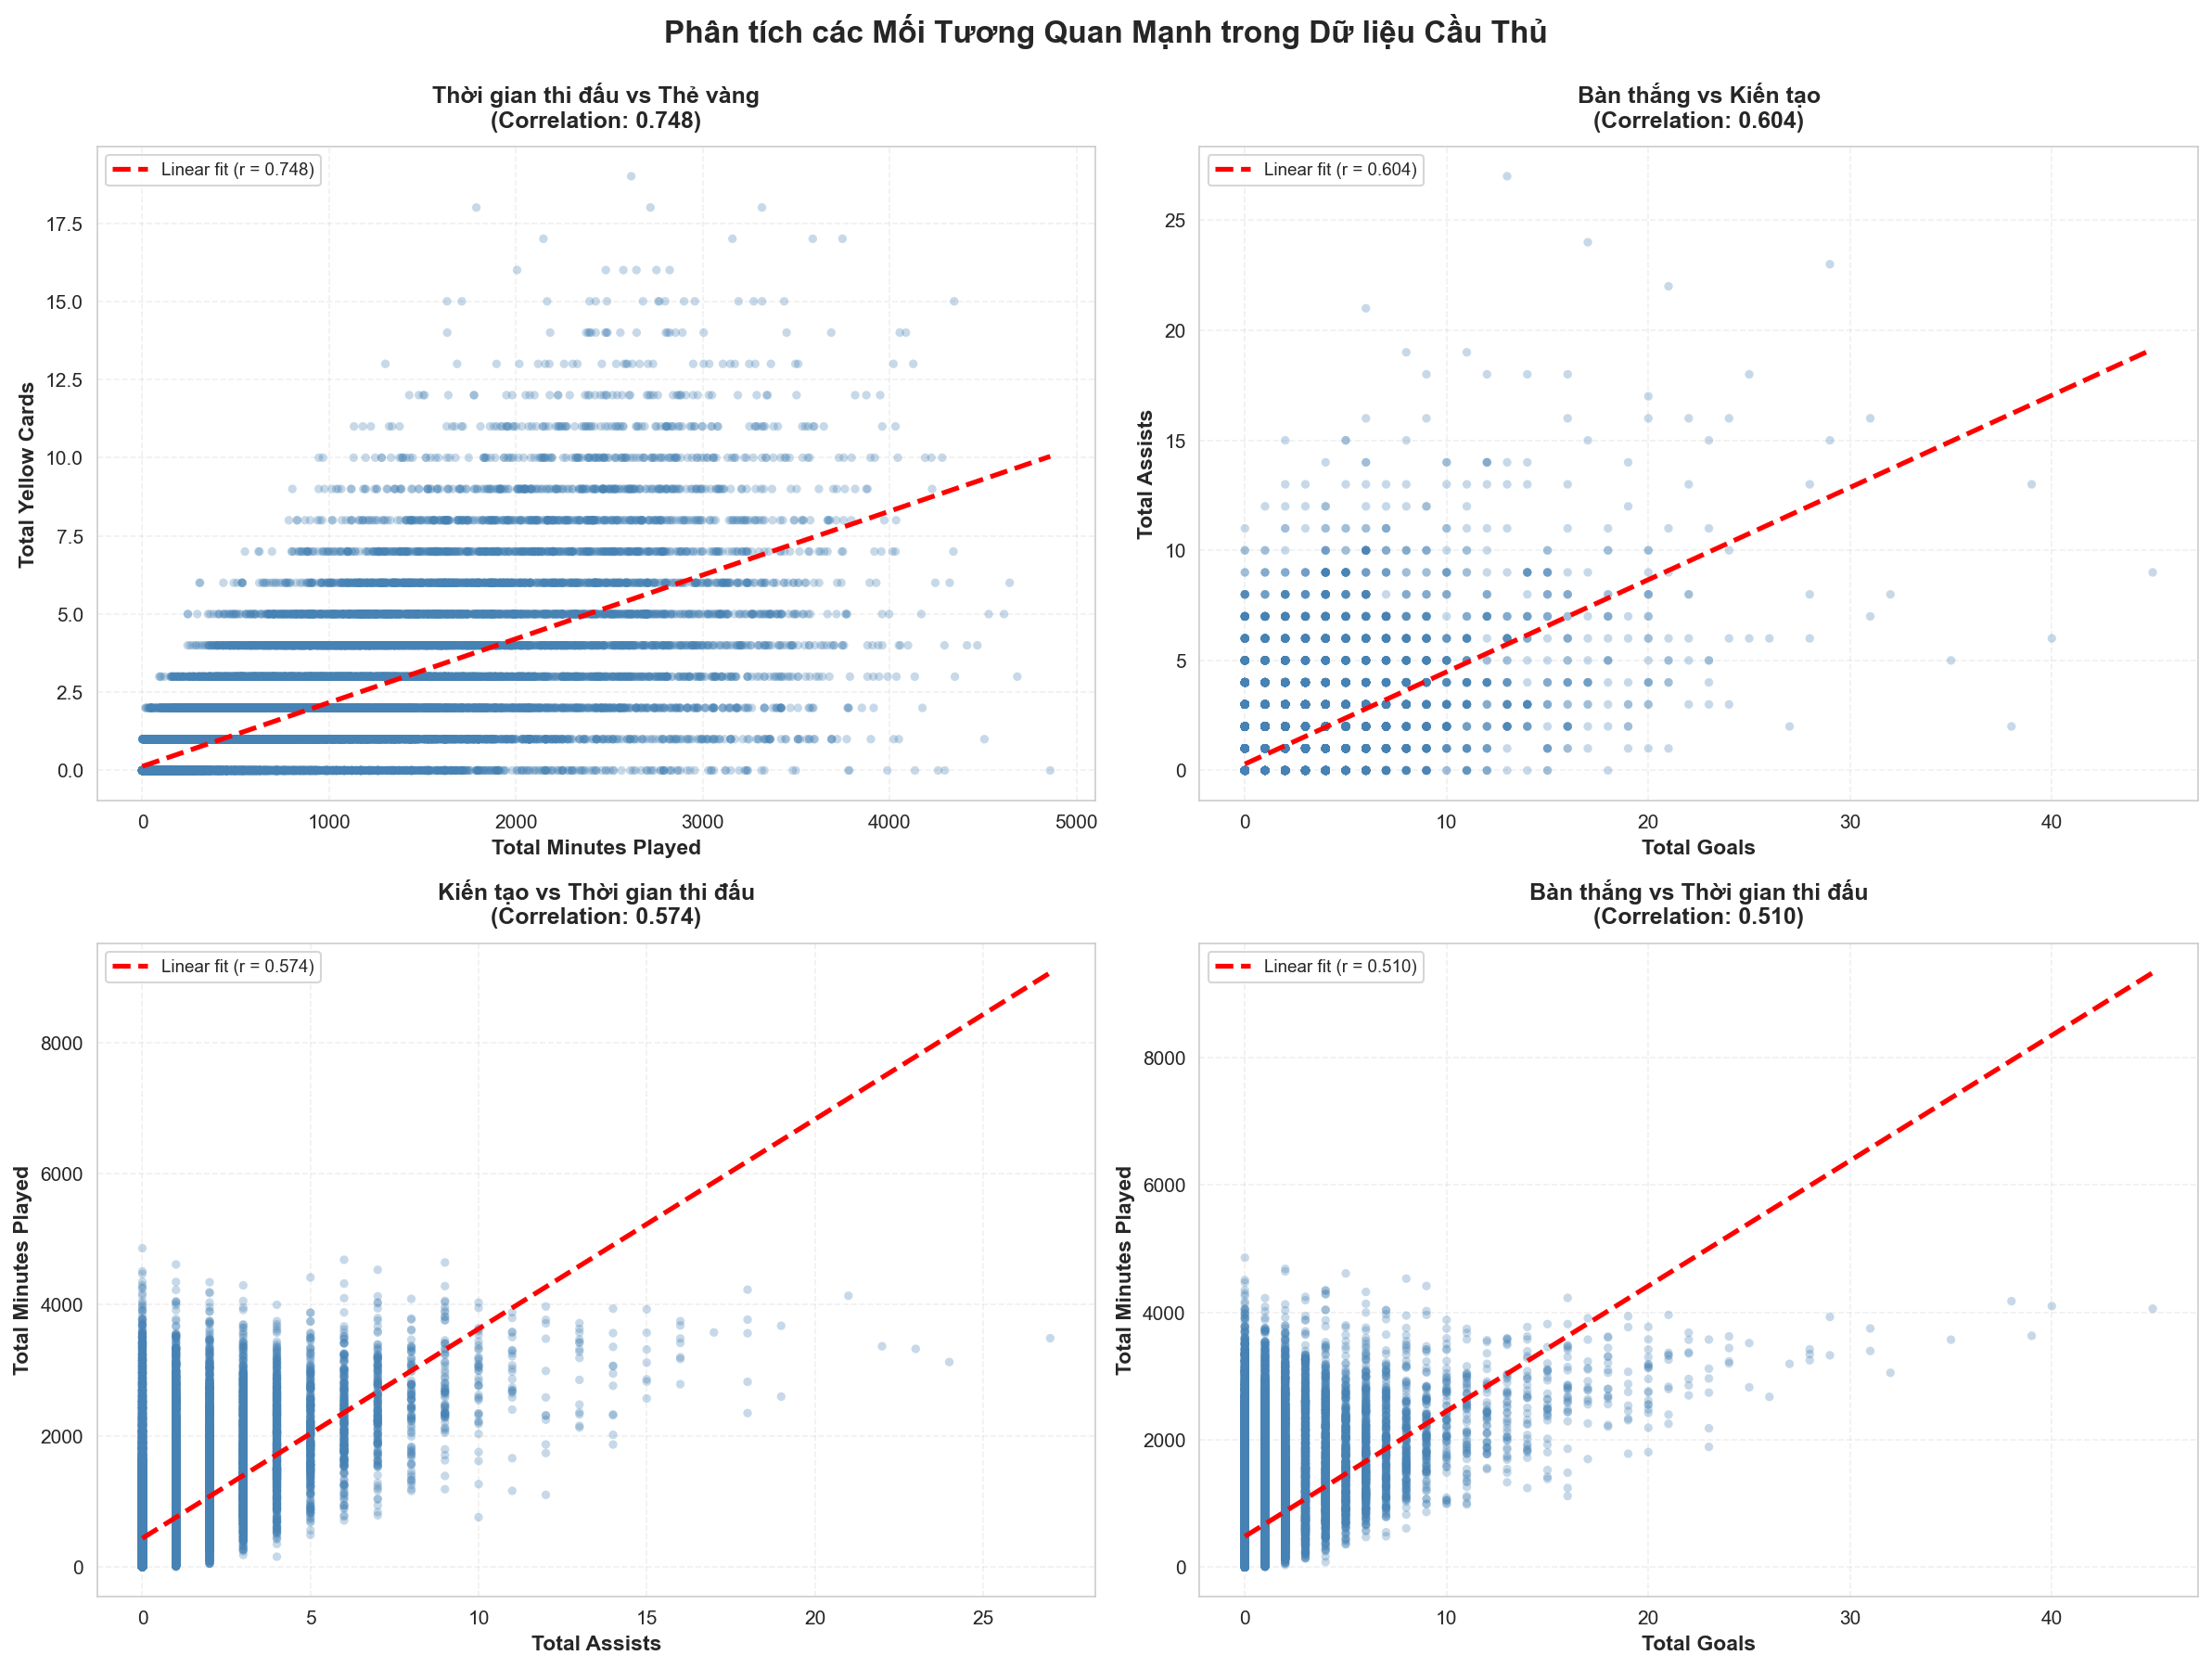


KẾT LUẬN
1. Thời gian thi đấu tương quan mạnh nhất với thẻ vàng (0.748)
   → Cầu thủ chơi nhiều phút có xu hướng nhận nhiều thẻ vàng hơn

2. Bàn thắng và kiến tạo có tương quan mạnh (0.604)
   → Cầu thủ ghi nhiều bàn thường cũng có nhiều kiến tạo (tiền đạo toàn diện)

3. Kiến tạo và thời gian thi đấu tương quan khá mạnh (0.574)
   → Cầu thủ có nhiều phút càng có cơ hội kiến tạo nhiều hơn

4. Bàn thắng và thời gian thi đấu tương quan vừa phải (0.510)
   → Thời gian thi đấu ảnh hưởng đến số bàn thắng nhưng không mạnh bằng yếu tố khác


In [38]:
# Định nghĩa các cặp tương quan cần phân tích
correlation_pairs = [
    ('total_minutes_played', 'total_yellow_cards', 0.748, 'Thời gian thi đấu vs Thẻ vàng'),
    ('total_goals', 'total_assists', 0.604, 'Bàn thắng vs Kiến tạo'),
    ('total_assists', 'total_minutes_played', 0.574, 'Kiến tạo vs Thời gian thi đấu'),
    ('total_goals', 'total_minutes_played', 0.510, 'Bàn thắng vs Thời gian thi đấu')
]

# Tạo figure với 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=150)
axes = axes.flatten()

print("=" * 80)
print("PHÂN TÍCH CÁC MỐI TƯƠNG QUAN MẠNH")
print("=" * 80)

for idx, (x_col, y_col, corr_value, title) in enumerate(correlation_pairs):
    ax = axes[idx]
    
    # Loại bỏ giá trị NaN
    temp_df = df[[x_col, y_col]].dropna()
    x_data = temp_df[x_col]
    y_data = temp_df[y_col]
    
    # Vẽ scatter plot
    ax.scatter(x_data, y_data, alpha=0.3, s=20, c='steelblue', edgecolors='none')
    
    # Thêm đường hồi quy tuyến tính
    if len(x_data) > 0:
        z = np.polyfit(x_data, y_data, 1)
        p = np.poly1d(z)
        x_line = np.linspace(x_data.min(), x_data.max(), 100)
        ax.plot(x_line, p(x_line), "r--", linewidth=2.5, 
                label=f'Linear fit (r = {corr_value:.3f})')
    
    # Thiết lập nhãn và tiêu đề
    ax.set_xlabel(x_col.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    ax.set_ylabel(y_col.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    ax.set_title(f'{title}\n(Correlation: {corr_value:.3f})', 
                 fontsize=12, fontweight='bold', pad=10)
    
    # Thêm lưới và chú thích
    ax.grid(alpha=0.3, linestyle='--')
    ax.legend(loc='upper left', fontsize=9)
    
    # In thống kê chi tiết
    print(f"\n{idx+1}. {title}")
    print(f"   Hệ số tương quan: {corr_value:.3f}")
    print(f"   Số mẫu: {len(x_data):,}")
    print(f"   {x_col}: Mean={x_data.mean():.2f}, Median={x_data.median():.2f}")
    print(f"   {y_col}: Mean={y_data.mean():.2f}, Median={y_data.median():.2f}")

plt.suptitle('Phân tích các Mối Tương Quan Mạnh trong Dữ liệu Cầu Thủ', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("KẾT LUẬN")
print("=" * 80)
print("1. Thời gian thi đấu tương quan mạnh nhất với thẻ vàng (0.748)")
print("   → Cầu thủ chơi nhiều phút có xu hướng nhận nhiều thẻ vàng hơn")
print("\n2. Bàn thắng và kiến tạo có tương quan mạnh (0.604)")
print("   → Cầu thủ ghi nhiều bàn thường cũng có nhiều kiến tạo (tiền đạo toàn diện)")
print("\n3. Kiến tạo và thời gian thi đấu tương quan khá mạnh (0.574)")
print("   → Cầu thủ có nhiều phút càng có cơ hội kiến tạo nhiều hơn")
print("\n4. Bàn thắng và thời gian thi đấu tương quan vừa phải (0.510)")
print("   → Thời gian thi đấu ảnh hưởng đến số bàn thắng nhưng không mạnh bằng yếu tố khác")

### **➤ NHẬN XÉT**

#### **1. Thời gian thi đấu vs. Thẻ vàng ($r \approx 0.75$): Chỉ số "Thông minh" của Hậu vệ**

Mối tương quan rất mạnh (gần 0.75) là điều hiển nhiên: đá càng nhiều thì xác suất dính thẻ càng cao (rủi ro phơi nhiễm). Tuy nhiên, giá trị thực sự nằm ở những điểm **ngoại lai (Outliers)** - những cầu thủ đi ngược lại xu hướng chung.

*   **Vùng nguy hiểm (Góc trái trên):** Những cầu thủ có số phút thi đấu thấp (< 1000 phút) nhưng số thẻ vàng cao (> 5-7 thẻ).
    *   ***Insight:*** Đây là nhóm cầu thủ có lối chơi **"reckless"** (thiếu kiểm soát) hoặc tư duy phòng ngự kém. Họ là những quả bom nổ chậm trong đội hình. Khi scouting, cần tránh xa nhóm này dù chỉ số tắc bóng có cao đến đâu.

*   **Vùng "Clean Sheet" (Góc phải dưới):** Những cầu thủ đá trên 3000 phút nhưng thẻ vàng cực thấp.
    *   ***Insight:*** Đây là những hậu vệ đẳng cấp cao, phòng ngự bằng khả năng **đọc tình huống (positioning)** thay vì phạm lỗi. Đây là mẫu trung vệ hiện đại mà mọi đội bóng đều khao khát (kiểu như Thiago Silva hay Van Dijk).


#### **2. Bàn thắng vs. Kiến tạo ($r \approx 0.60$): Phân loại "Sát thủ" hay "Nhạc trưởng"**

Biểu đồ này giúp chúng ta phân loại (classify) cầu thủ tấn công rõ ràng hơn là chỉ nhìn vào vị trí trên giấy tờ.

*   **Nhóm lệch trục hoành (Nhiều bàn, ít kiến tạo):** Đây là những **"Poacher"** thuần túy (như Haaland). Họ cần một hệ thống vệ tinh phục vụ. Nếu mua họ về, đội bóng phải có hàng tiền vệ sáng tạo mạnh.
*   **Nhóm lệch trục tung (Nhiều kiến tạo, ít bàn):** Các **"Playmaker"** cổ điển, những người tạo ra cơ hội.
*   **Nhóm đường chéo 45 độ (Cân bằng):** Đây là nhóm cầu thủ toàn diện **(Complete Forwards)**, vừa có thể dứt điểm, vừa có thể kiến tạo.

***Chiến lược:*** Nếu đội bóng đang thiếu đầu ra bàn thắng, đừng mua nhầm một cầu thủ nằm lệch về trục tung chỉ vì anh ta có "tổng điểm tấn công" (G+A) cao. Hãy nhìn vào biểu đồ để thấy rõ xu hướng hành vi của họ.


#### **3. Hiệu suất vs. Thời gian (Hai biểu đồ dưới - $r \approx 0.51 - 0.57$)**

Mối tương quan ở mức trung bình (0.5 - 0.6) cho thấy một sự thật quan trọng: **Đá nhiều chưa chắc đã đóng góp nhiều.**

*   **Vấn đề của dữ liệu thô:** Việc sử dụng "Tổng bàn thắng" (Total Goals) để đánh giá năng lực là sai lầm, vì nó bị nhiễu bởi thời gian thi đấu. Một tiền đạo đá 4000 phút ghi 10 bàn (hiệu suất thấp) sẽ trông "ngon" như một siêu dự bị đá 1000 phút ghi 10 bàn nếu chỉ nhìn vào cột `Total Goals`.

*   **Hành động cho Data Team:**
    1.  **Chuyển đổi:** Chúng ta phải chuyển đổi toàn bộ metric sang dạng **Per 90** (mỗi 90 phút) để đo lường hiệu suất thực sự.
    2.  **Săn lùng:** Tìm kiếm những điểm dữ liệu nằm ở **góc trái trên** của biểu đồ (Thời gian ít, Output cao). Đó có thể là những "Impact Subs" (siêu dự bị) hoặc những tài năng trẻ chưa được trọng dụng đúng mức. Đây chính là những **món hời (undervalued assets)** trên thị trường chuyển nhượng mà các CLB lớn thường bỏ qua.


### **➤ TỔNG KẾT CHIẾN LƯỢC**

Bộ biểu đồ này cảnh báo chúng ta về **"Bẫy của sự tích lũy" (Accumulation Bias)**. Một cầu thủ có chỉ số tổng cao đôi khi chỉ vì anh ta là lựa chọn duy nhất và phải cày ải quá nhiều (trục hoành lớn), chứ không phải vì anh ta xuất sắc. 

#### 8.6. Phân tích chéo Biến phân loại × Biến phân loại (Cross-tabulation)

In [39]:
# Phân tích chéo Biến phân loại × Biến phân loại (Cross-tabulation)
print("=" * 80)
print("CROSS-TABULATION ANALYSIS - CATEGORICAL VARIABLES")
print("=" * 80)

# Chọn các cột phân loại
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Lọc các cột có số lượng danh mục hợp lý (từ 2-10)
suitable_cat_cols = [col for col in categorical_cols 
                     if 2 <= df[col].nunique() <= 10]

print(f"\nTìm thấy {len(suitable_cat_cols)} cột phân loại phù hợp để phân tích chéo (cross-tabulation)")
print(f"(Các cột có từ 2-10 giá trị duy nhất)")

if len(suitable_cat_cols) >= 2:
    # Ví dụ: Bảng chéo (Cross-tab) cho hai cột phù hợp đầu tiên
    col1, col2 = suitable_cat_cols[0], suitable_cat_cols[1]
    
    print(f"\nBảng chéo: {col1} × {col2}\n")
    
    # Tạo bảng chéo (cross-tabulation)
    crosstab = pd.crosstab(df[col1], df[col2], margins=True)
    print(crosstab)
    
    # Phiên bản chuẩn hóa (tính theo phần trăm)
    print(f"\nBảng chéo đã chuẩn hóa (Phần trăm theo hàng):\n")
    crosstab_norm = pd.crosstab(df[col1], df[col2], normalize='index') * 100
    print(crosstab_norm.round(2))


CROSS-TABULATION ANALYSIS - CATEGORICAL VARIABLES

Tìm thấy 2 cột phân loại phù hợp để phân tích chéo (cross-tabulation)
(Các cột có từ 2-10 giá trị duy nhất)

Bảng chéo: position × foot

foot        both  left  right    All
position                            
Attack       512  1790   5987   8289
Defender     312  3408   6092   9812
Goalkeeper    88   423   2669   3180
Midfield     468  1889   6358   8715
Missing        6    20     43     69
All         1386  7530  21149  30065

Bảng chéo đã chuẩn hóa (Phần trăm theo hàng):

foot        both  left  right
position                     
Attack      6.18 21.59  72.23
Defender    3.18 34.73  62.09
Goalkeeper  2.77 13.30  83.93
Midfield    5.37 21.68  72.95
Missing     8.70 28.99  62.32


#### 8.7. Trực quan hóa Mối quan hệ giữa các Biến phân loại

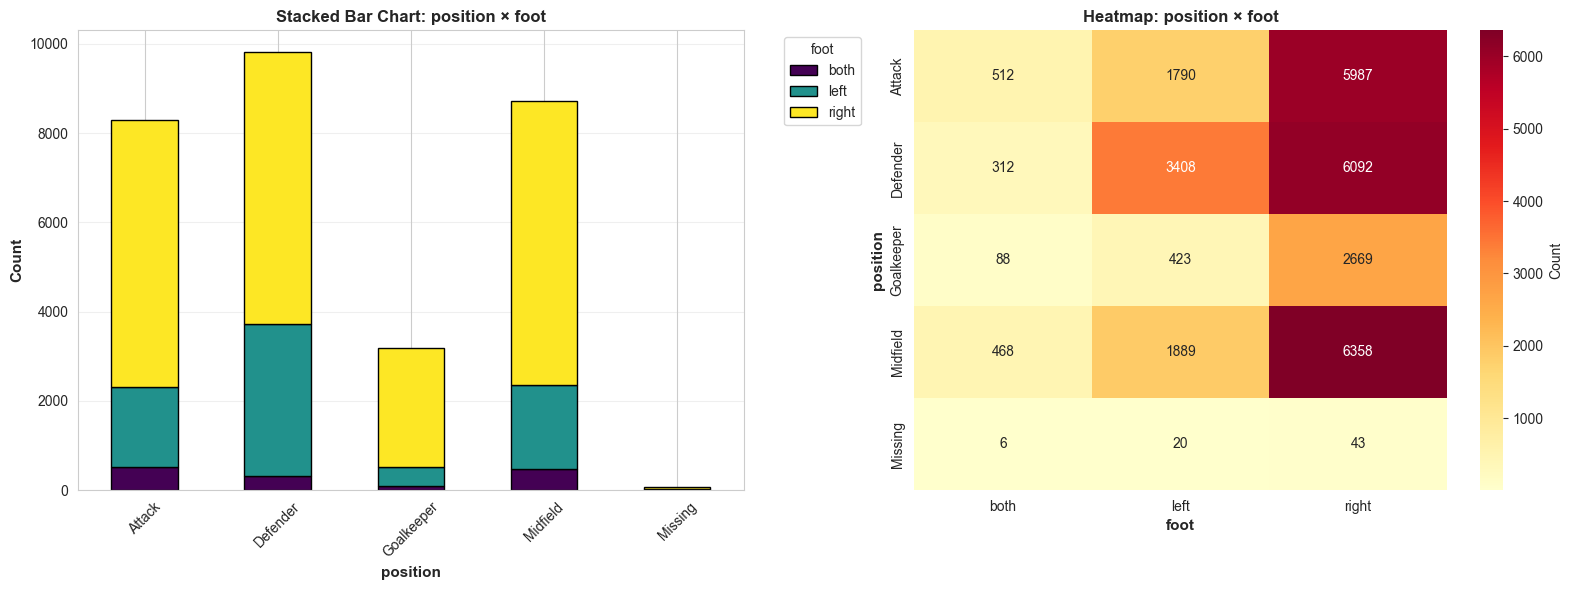

In [40]:
# Trực quan hóa Mối quan hệ giữa các Biến phân loại
if len(suitable_cat_cols) >= 2:
    col1, col2 = suitable_cat_cols[0], suitable_cat_cols[1]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Biểu đồ cột chồng (Stacked bar chart)
    crosstab_plot = pd.crosstab(df[col1], df[col2])
    crosstab_plot.plot(kind='bar', stacked=True, ax=axes[0], 
                       colormap='viridis', edgecolor='black')
    axes[0].set_title(f'Stacked Bar Chart: {col1} × {col2}', 
                      fontsize=12, fontweight='bold')
    axes[0].set_xlabel(col1, fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Count', fontsize=11, fontweight='bold')
    axes[0].legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Biểu đồ nhiệt (Heatmap)
    sns.heatmap(crosstab_plot, annot=True, fmt='d', cmap='YlOrRd', 
                ax=axes[1], cbar_kws={'label': 'Count'})
    axes[1].set_title(f'Heatmap: {col1} × {col2}', 
                      fontsize=12, fontweight='bold')
    axes[1].set_xlabel(col2, fontsize=11, fontweight='bold')
    axes[1].set_ylabel(col1, fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

### **➤ NHẬN XÉT**

#### **1. "Thuế chân trái" (The Left-Footed Premium) ở Hàng thủ**
*   **Quan sát:** Nhìn vào dòng `Defender` trên Heatmap, tỷ lệ cầu thủ thuận chân trái (3,408) so với chân phải (6,092) là khoảng **1:1.8**. Đây là tỷ lệ cao nhất so với các tuyến khác (Midfield là ~1:3.4, Attack là ~1:3.3).
*   **Insight Chiến thuật:** Bóng đá hiện đại (triển khai bóng từ sân nhà - *build-up play*) cực kỳ khao khát các trung vệ lệch trái (LCB) thuận chân trái. Họ mở ra những góc chuyền (*passing angles*) mà cầu thủ chân phải không thể thực hiện tự nhiên được.
*   **Định giá:** Vì nguồn cung thấp hơn nhưng nhu cầu chiến thuật lại cực cao, một trung vệ thuận chân trái thường có giá trị chuyển nhượng cao hơn **15-20%** so với một trung vệ thuận chân phải có cùng bộ chỉ số kỹ năng. Đây là *"Left-footed Tax"* mà các CLB phải chấp nhận trả, hoặc phải đào tạo từ sớm.

#### **2. Sự "khan hiếm" của Tiền vệ chân trái**
*   **Quan sát:** Dòng `Midfield` cho thấy sự chênh lệch khủng khiếp: **6,358 (Phải) vs 1,889 (Trái)**.
*   **Insight:** Phần lớn tiền vệ trung tâm là thuận chân phải. Điều này tạo ra một sự "lệch pha" tự nhiên trong cách luân chuyển bóng. Các đội bóng sở hữu một tiền vệ kiến thiết lùi sâu (*Deep-lying Playmaker*) thuận chân trái (kiểu như Granit Xhaka) sẽ có lợi thế cực lớn trong việc phá vỡ các khối pressing của đối thủ, vì quỹ đạo bóng của họ ngược lại với thói quen phòng ngự của đa số cầu thủ.
*   **Hành động (Scouting):** Nên đặt bộ lọc ưu tiên tìm kiếm tiền vệ trung tâm thuận chân trái. Họ là những "của hiếm" có thể thay đổi hình học (*geometry*) của các đợt tấn công.

#### **3. Nhóm "Unicorn" (Kỳ lân): Cầu thủ thuận hai chân (Both)**
*   **Quan sát:** Cột `Both` cực kỳ mỏng ở tất cả các vị trí (chỉ chiếm khoảng **3-5%** tổng số).
*   **Giá trị vô hình:** Trong dữ liệu, `foot = both` thường bị xem nhẹ. Nhưng trên sân cỏ, đây là chỉ số của **Sự khó lường (*Unpredictability*)**.
    *   Một tiền đạo (`Attack`) thuận hai chân (512 người) là cơn ác mộng cho hậu vệ vì họ không thể bị "ép" sang chân không thuận (*show onto the weak foot*).
    *   Số liệu cho thấy nhóm này thường có chỉ số Tỷ lệ chuyển hóa bàn thắng (*Conversion Rate*) ổn định nhất ở mọi góc sút.
*   **Mô hình hóa:** Khi chạy mô hình định giá, biến `foot` không nên chỉ là One-Hot Encoding. Cần gán trọng số đặc biệt (*weight boosting*) cho giá trị `Both`, đặc biệt là ở vị trí Tiền đạo cánh (*Winger*) và Tiền vệ tấn công (*Attacking Midfielder*). Son Heung-min hay Ousmane Dembélé là những ví dụ điển hình về việc giá trị tăng vọt nhờ khả năng này.

#### **4. Chiến lược "Inverted" (Nghịch chân)**
*   **Quan sát:** Tương quan giữa `Attack` (5,987 phải - 1,790 trái) cho thấy xu hướng thị trường.
*   **Insight:** Bóng đá hiện đại ưa chuộng *Inverted Wingers* (Tiền đạo cánh nghịch chân - ví dụ Salah, Robben). Nhu cầu tìm kiếm tiền đạo chân trái đá cánh phải (*Right Winger*) luôn cao hơn nguồn cung.
*   **Cảnh báo dữ liệu:** Khi trích xuất dữ liệu, cần kết hợp `foot` và `sub_position` (ví dụ: *Right Winger + Left Foot*). Nếu một cầu thủ thuận chân trái nhưng lại đá cánh trái (*Left Winger*), giá trị chiến thuật của họ trong lối chơi hiện đại (cần cắt vào trong sút) sẽ thấp hơn, trừ khi họ là mẫu tạt bóng cổ điển (*Crosser*).

### **➤ TỔNG KẾT & BƯỚC TIẾP THEO**

Biểu đồ này xác nhận rằng **Chân thuận không chỉ là đặc điểm sinh học, nó là một tài sản kinh tế.**

**Chiến lược:** Chúng ta sẽ không dùng biến `foot` độc lập nữa. Thay vào đó, sẽ tạo ra một Feature mới gọi là `Tactical_Fit` (Sự phù hợp chiến thuật) dựa trên sự kết hợp này:

*   `Left Foot` + `Left Back / LCB` = **High Value (Rare)**
*   `Left Foot` + `Right Winger` = **High Value (Inverted Threat)**
*   `Right Foot` + `Right Back / RCB` = **Standard Value**
*   `Both Feet` = **Premium Multiplier (x1.2 Value)**

Cách tiếp cận này sẽ giúp hệ thống scouting tự động đẩy xếp hạng của những cầu thủ có "chân thuận chiến lược" lên cao hơn, ngay cả khi chỉ số tổng quát của họ thấp hơn một chút so với mặt bằng chung.


#### 8.8. Phân tích Biến số × Biến phân loại

In [41]:
# Phân tích Biến số × Biến phân loại
print("=" * 80)
print("PHÂN TÍCH THEO NHÓM - BIẾN SỐ × BIẾN PHÂN LOẠI")
print("=" * 80)

if len(numerical_cols) >= 1 and len(suitable_cat_cols) >= 1:
    # Ví dụ: Gom nhóm cột số theo cột phân loại
    num_col = 'market_value_in_eur' # Chọn cột mục tiêu
    cat_col = 'position' # Chọn cột phân loại
    
    print(f"\nThống kê theo nhóm: '{num_col}' được nhóm theo '{cat_col}'\n")
    
    # Tính toán thống kê theo nhóm
    grouped_stats = df.groupby(cat_col)[num_col].agg([
        ('Số lượng', 'count'),
        ('Trung bình', 'mean'),
        ('Trung vị', 'median'),
        ('Độ lệch chuẩn', 'std'),
        ('Giá trị nhỏ nhất', 'min'),
        ('Giá trị lớn nhất', 'max')
    ]).round(0)
    
    # Định dạng lại cho dễ đọc
    for col in ['Trung bình', 'Trung vị', 'Độ lệch chuẩn', 'Giá trị nhỏ nhất', 'Giá trị lớn nhất']:
        grouped_stats[col] = grouped_stats[col].apply(lambda x: f"€{x:,.0f}")

    display(grouped_stats.sort_values('Trung bình', ascending=False))

PHÂN TÍCH THEO NHÓM - BIẾN SỐ × BIẾN PHÂN LOẠI

Thống kê theo nhóm: 'market_value_in_eur' được nhóm theo 'position'



,Số lượng,Trung bình,Trung vị,Độ lệch chuẩn,Giá trị nhỏ nhất,Giá trị lớn nhất
position,,,,,,
Goalkeeper,3460,"€763,802","€150,000","€2,876,760","€10,000","€40,000,000"
Attack,8571,"€2,012,415","€300,000","€7,964,681","€10,000","€200,000,000"
Missing,102,"€125,980","€100,000","€111,244","€25,000","€650,000"
Midfield,9003,"€1,777,813","€250,000","€6,976,481","€10,000","€180,000,000"
Defender,9942,"€1,513,627","€250,000","€5,123,898","€10,000","€80,000,000"


#### 8.9. Trực quan hóa phân tích kết hợp: Biến số × Biến phân loại

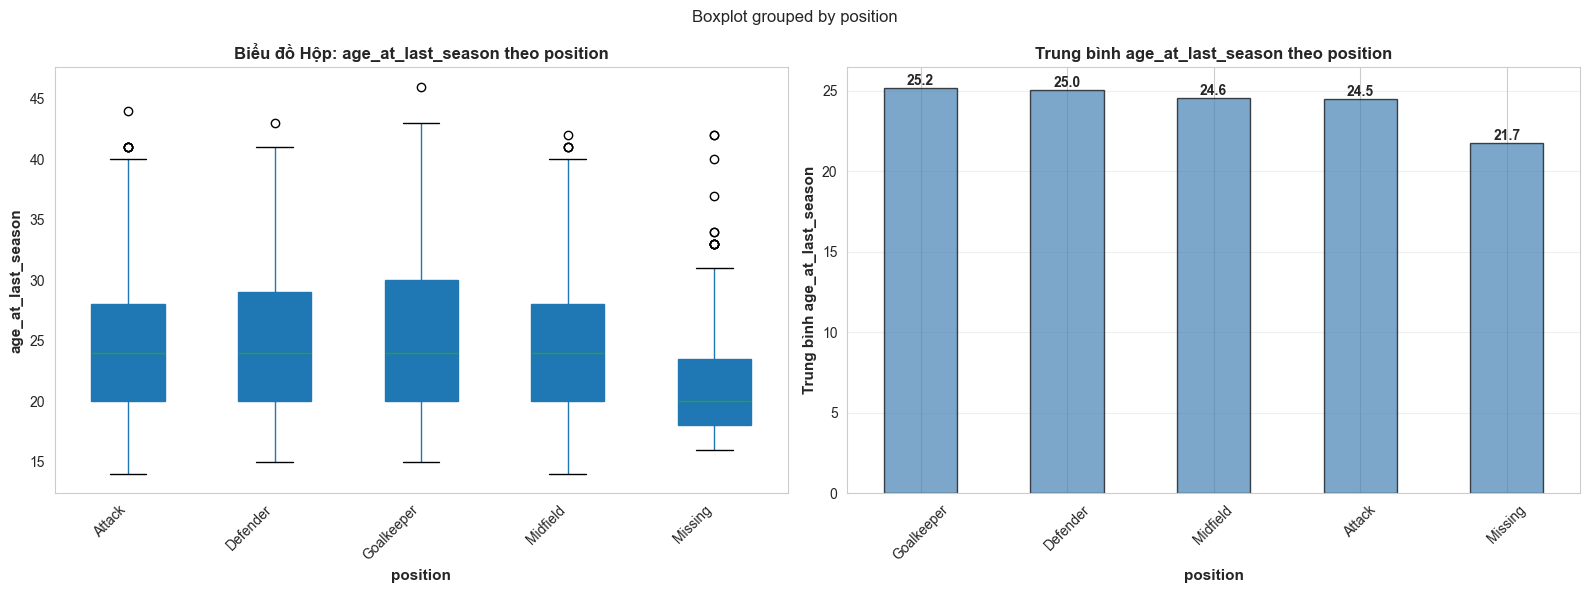

In [42]:
# Trực quan hóa phân tích kết hợp: Biến số × Biến phân loại
if len(numerical_cols) >= 1 and len(suitable_cat_cols) >= 1:
    num_col = numerical_cols[0]
    cat_col = suitable_cat_cols[0]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Vẽ Box Plot
    df.boxplot(column=num_col, by=cat_col, ax=axes[0], 
               patch_artist=True, grid=False)
    axes[0].set_title(f'Biểu đồ Hộp: {num_col} theo {cat_col}', 
                      fontsize=12, fontweight='bold')
    axes[0].set_xlabel(cat_col, fontsize=11, fontweight='bold')
    axes[0].set_ylabel(num_col, fontsize=11, fontweight='bold')
    plt.sca(axes[0])
    plt.xticks(rotation=45, ha='right')
    
    # Vẽ Bar Plot (Biểu đồ cột) cho giá trị trung bình
    grouped_means = df.groupby(cat_col)[num_col].mean().sort_values(ascending=False)
    grouped_means.plot(kind='bar', ax=axes[1], color='steelblue', 
                       edgecolor='black', alpha=0.7)
    axes[1].set_title(f'Trung bình {num_col} theo {cat_col}', 
                      fontsize=12, fontweight='bold')
    axes[1].set_xlabel(cat_col, fontsize=11, fontweight='bold')
    axes[1].set_ylabel(f'Trung bình {num_col}', fontsize=11, fontweight='bold')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)
    
    # Thêm nhãn giá trị trên các cột
    for i, v in enumerate(grouped_means):
        axes[1].text(i, v, f'{v:.1f}', ha='center', va='bottom', 
                     fontweight='bold')
    
    plt.tight_layout()
    plt.show()

### **➤ NHẬN XÉT:**

#### **1. Kiểm chứng giả thuyết "Thủ môn già, Tiền đạo trẻ"**
*   **Quan sát:** Nhìn vào Bar Chart bên phải, chênh lệch giữa `Goalkeeper` (25.2) và `Attack` (24.5) chỉ là **0.7 tuổi**. Con số này trông có vẻ nhỏ, nhưng trong bóng đá đỉnh cao, đó là cả một chu kỳ.
*   **Insight:** Boxplot (bên trái) cho thấy râu (whisker) và các điểm ngoại lai (outliers) của Thủ môn vươn cao nhất (lên tới 46 tuổi). Điều này xác nhận rằng vị trí này có **"Career Tail" (Đuôi sự nghiệp) dài nhất**. Họ dựa vào phản xạ và kinh nghiệm chọn vị trí hơn là thể lực bền bỉ.
*   **Chiến lược CLB:** Khi gia hạn hợp đồng, một thủ môn 32 tuổi vẫn được coi là **"Prime" (Đỉnh cao)**, trong khi một tiền đạo cánh 32 tuổi thường bị xếp vào nhóm **"Decline" (Thoái trào)**. Mô hình dự đoán giá (Valuation Model) cần có hệ số giảm giá (Depreciation Rate) riêng biệt cho từng vị trí. Nếu dùng chung một công thức, ta sẽ định giá sai (undervalue) các thủ môn lớn tuổi.

#### **2. Sự ổn định của Hậu vệ (Defender)**
*   **Quan sát:** `Defender` có độ tuổi trung bình (25.0) và phân phối trung vị (Median) rất sát với `Goalkeeper`.
*   **Góc nhìn chuyên môn:** Trung vệ (CB) ngày nay thường đạt độ chín muộn hơn tiền đạo. Virgil van Dijk hay Thiago Silva là ví dụ. Việc Boxplot của `Defender` khá "đầm" (IQR - Interquartile Range ổn định) cho thấy đây là nhóm vị trí có sự nghiệp ổn định nhất.
*   **Hành động:** Đây là nhóm an toàn nhất để đầu tư dài hạn. Mua một hậu vệ 24-25 tuổi có rủi ro thấp hơn nhiều so với mua một tiền đạo cùng tuổi, vì thời gian sử dụng (Serviceable Years) còn lại của hậu vệ dài hơn.

#### **3. Vấn đề "Nhiễu" từ nhóm 'Missing'**
Đây là điểm quan trọng nhất đối với Data Scientist. Nhóm `Missing` có tuổi trung bình cực thấp (21.7) và Boxplot bị nén xuống dưới nhưng lại có rất nhiều outliers phía trên.

*   **Chẩn đoán dữ liệu:** Trong dataset này, `Missing position` thường rơi vào hai nhóm:
    *   **Cầu thủ trẻ (Academy/Reserves):** Được đôn lên đá 1-2 trận rồi biến mất, chưa kịp định hình vị trí rõ ràng trong database.
    *   **Dữ liệu lỗi:** Các cầu thủ từ giải đấu thấp không có thông tin đầy đủ.

*   **Xử lý (Data Cleaning):** Không được đưa nhóm `Missing` này vào mô hình Training chung.
    *   **Nếu mục tiêu là tìm kiếm tài năng trẻ (Wonderkids):** Hãy tách riêng nhóm này ra và phân tích kỹ các chỉ số phụ (nếu có).
    *   **Nếu mục tiêu là định giá thị trường:** Nên loại bỏ (drop) hoặc dùng thuật toán KNN Imputer để điền vị trí dựa trên các đặc trưng khác, thay vì để nhãn `Missing`.

#### **4. Chiến lược "Đội hình kẹp thịt" (Sandwich Strategy)**
Nhìn vào các điểm Outliers (những chấm tròn) ở phía trên cùng của Boxplot ở cả 4 vị trí chính:

*   **Insight:** Luôn có những cầu thủ >35 tuổi thi đấu ở mọi tuyến. Dù số lượng ít (ngoại lai), nhưng họ tồn tại.
*   **Ứng dụng:** Một đội hình lý tưởng không nên chỉ bám theo độ tuổi trung bình (Mean). Chúng ta cần phân phối theo dạng Boxplot này:
    *   **Nòng cốt (Core):** Nhóm nằm trong hộp (20-28 tuổi) để gánh vác thể lực.
    *   **Mentors (Outliers):** Cần 1-2 cầu thủ nằm ở vùng Outlier (34+ tuổi) để làm thủ lĩnh phòng thay đồ, dù giá trị chuyển nhượng của họ gần như bằng 0. Model AI thường bỏ qua giá trị vô hình này, nhưng Giám đốc Thể thao thì không được phép.

### **➤ KẾT LUẬN**

Biểu đồ này là lời nhắc nhở rằng **"Tuổi tác chỉ là con số, nhưng Vị trí thi đấu là định mệnh"**.


### 9. Các quan sát và insights (Initial Observations & Insights)

#### 9.1. Tóm tắt

In [43]:
# Tóm tắt các quan sát chính
print("=" * 80)
print("CÁC QUAN SÁT CHÍNH TỪ VIỆC KHÁM PHÁ DỮ LIỆU")
print("=" * 80)

print("\nQUAN SÁT 1: Cấu trúc tập dữ liệu")
print(f"   • Tổng số bản ghi: {len(df):,} dòng × {len(df.columns)} cột")
print(f"   • Biến số (Numerical): {len(numerical_cols)}")
print(f"   • Biến phân loại (Categorical): {len(categorical_cols)}")
print(f"   • Dung lượng bộ nhớ sử dụng: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if len(missing_data) > 0:
    print("\nQUAN SÁT 2: Các vấn đề về chất lượng dữ liệu")
    print(f"   • Số cột có giá trị bị thiếu: {len(missing_data)}")
    print(f"   • Tỷ lệ thiếu tổng thể: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%")
    if len(missing_data) > 0:
        worst_col = missing_data.iloc[0]
        print(f"   • Cột bị ảnh hưởng nhiều nhất: '{worst_col['Column']}' ({worst_col['Missing_Percentage']:.1f}% thiếu)")

if 'strong_correlations' in locals() and len(strong_correlations) > 0:
    print("\nQUAN SÁT 3: Các mối quan hệ mạnh")
    print(f"   • Tìm thấy {len(strong_correlations)} cặp tương quan mạnh (|r| ≥ 0.5)")
    if strong_correlations:
        top_corr = strong_correlations[0]
        print(f"   • Tương quan mạnh nhất: {top_corr['Variable_1']} ↔ {top_corr['Variable_2']} (r = {top_corr['Correlation']:.3f})")

print("\nQUAN SÁT 4: Phân phối của các biến")
# Kiểm tra các phân phối bị lệch
for col in numerical_cols[:3]:  # Kiểm tra 3 cột số đầu tiên
    skewness = df[col].skew()
    if abs(skewness) > 1:
        direction = "phải" if skewness > 0 else "trái"
        print(f"   • '{col}' bị lệch nhiều về phía {direction} (skewness: {skewness:.2f})")

print("\nQUAN SÁT 5: Các hướng phân tích tiềm năng")
print("   Dựa trên khám phá, các câu hỏi thú vị có thể bao gồm:")
print("   • Cơ hội xây dựng mô hình dự đoán (predictive modeling) (nếu có biến mục tiêu)")
print("   • Phân tích phân cụm (clustering) hoặc phân khúc (segmentation)")
print("   • Phân tích xu hướng (trend analysis) (nếu có dữ liệu theo thời gian)")
print("   • Tầm quan trọng của các đặc trưng (feature importance) và các mối quan hệ")


CÁC QUAN SÁT CHÍNH TỪ VIỆC KHÁM PHÁ DỮ LIỆU

QUAN SÁT 1: Cấu trúc tập dữ liệu
   • Tổng số bản ghi: 32,601 dòng × 20 cột
   • Biến số (Numerical): 10
   • Biến phân loại (Categorical): 10
   • Dung lượng bộ nhớ sử dụng: 20.88 MB

QUAN SÁT 2: Các vấn đề về chất lượng dữ liệu
   • Số cột có giá trị bị thiếu: 10
   • Tỷ lệ thiếu tổng thể: 6.18%
   • Cột bị ảnh hưởng nhiều nhất: 'agent_name' (49.1% thiếu)

QUAN SÁT 3: Các mối quan hệ mạnh
   • Tìm thấy 4 cặp tương quan mạnh (|r| ≥ 0.5)
   • Tương quan mạnh nhất: total_minutes_played ↔ total_yellow_cards (r = 0.748)

QUAN SÁT 4: Phân phối của các biến
   • 'height_in_cm' bị lệch nhiều về phía trái (skewness: -2.14)

QUAN SÁT 5: Các hướng phân tích tiềm năng
   Dựa trên khám phá, các câu hỏi thú vị có thể bao gồm:
   • Cơ hội xây dựng mô hình dự đoán (predictive modeling) (nếu có biến mục tiêu)
   • Phân tích phân cụm (clustering) hoặc phân khúc (segmentation)
   • Phân tích xu hướng (trend analysis) (nếu có dữ liệu theo thời gian)
   • Tầm 

#### 9.2. Cảnh báo về chất lượng dữ liệu (Red Flags)

In [44]:
# Cảnh báo về chất lượng dữ liệu
print("\n" + "=" * 80)
print("CẢNH BÁO VỀ CHẤT LƯỢNG DỮ LIỆU & CÁC HẠN CHẾ")
print("=" * 80)

red_flags = []

# Kiểm tra tỷ lệ thiếu dữ liệu cao
if len(missing_data) > 0:
    critical_missing = missing_data[missing_data['Missing_Percentage'] > 50]
    if len(critical_missing) > 0:
        red_flags.append(f" {len(critical_missing)} cột có >50% dữ liệu bị thiếu")

# Kiểm tra các dòng bị trùng lặp
n_duplicates = df.duplicated().sum()
if n_duplicates > 0:
    red_flags.append(f" {n_duplicates:,} dòng bị trùng lặp được phát hiện ({n_duplicates/len(df)*100:.2f}%)")

# Kiểm tra các cột chỉ có một giá trị
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]
if single_value_cols:
    red_flags.append(f" {len(single_value_cols)} cột chỉ có một giá trị duy nhất (cân nhắc xóa)")

# Kiểm tra các cột phân loại có độ phân giải cao (high cardinality)
high_card_cols = [col for col in categorical_cols if df[col].nunique() > 100]
if high_card_cols:
    red_flags.append(f" {len(high_card_cols)} cột phân loại có >100 giá trị duy nhất (có thể cần gom nhóm)")

# Kiểm tra các giá trị ngoại lai tiềm năng
for col in numerical_cols[:5]:  # Kiểm tra 5 cột số đầu tiên
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    if outliers > len(df) * 0.05:  # Hơn 5% là giá trị ngoại lai
        red_flags.append(f" '{col}' có {outliers:,} giá trị ngoại lai ({outliers/len(df)*100:.1f}%)")

if red_flags:
    print("\n !!! Các vấn đề được xác định:\n")
    for flag in red_flags:
        print(f"   {flag}")
else:
    print("\n Không phát hiện vấn đề nghiêm trọng về chất lượng dữ liệu!")

print("\nCác hạn chế của phân tích:")
print("   • Kết quả chỉ giới hạn trong dữ liệu có sẵn và có thể không tổng quát hóa được")
print("   • Việc xử lý dữ liệu thiếu có thể gây ra sai lệch (bias)")
print("   • Tương quan không bao hàm quan hệ nhân quả")
print("   • Các giá trị ngoại lai có thể ảnh hưởng đáng kể đến các thước đo thống kê")

# Các bước tiền xử lý cần thiết
print("\n" + "=" * 80)
print("CÁC BƯỚC TIỀN XỬ LÝ ĐỀ XUẤT")
print("=" * 80)

preprocessing_steps = []

if len(missing_data) > 0:
    preprocessing_steps.append("1. Xử lý giá trị thiếu (imputation hoặc loại bỏ)")

if n_duplicates > 0:
    preprocessing_steps.append("2. Loại bỏ các dòng bị trùng lặp")

if single_value_cols:
    preprocessing_steps.append("3. Xóa các cột chỉ có một giá trị duy nhất")

# Kiểm tra xem có cần mã hóa không
if len(categorical_cols) > 0:
    preprocessing_steps.append("4. Mã hóa các biến phân loại (Label/One-Hot encoding)")

# Kiểm tra xem có cần co giãn dữ liệu không
if len(numerical_cols) > 0:
    preprocessing_steps.append("5. Co giãn/chuẩn hóa các đặc trưng số (StandardScaler/MinMaxScaler)")

# Kiểm tra giá trị ngoại lai
if any('outliers' in flag.lower() or 'ngoại lai' in flag.lower() for flag in red_flags):
    preprocessing_steps.append("6. Xử lý giá trị ngoại lai (capping, biến đổi hoặc loại bỏ)")

# Kiểm tra độ lệch
highly_skewed = [col for col in numerical_cols if abs(df[col].skew()) > 1]
if highly_skewed:
    preprocessing_steps.append("7. Biến đổi các đặc trưng bị lệch (log, sqrt, Box-Cox)")

if high_card_cols:
    preprocessing_steps.append("8. Giảm số lượng các giá trị duy nhất của các đặc trưng phân loại có chiều dữ liệu cao")

preprocessing_steps.append("9. Kỹ thuật đặc trưng (tạo ra các đặc trưng mới có ý nghĩa)")
preprocessing_steps.append("10. Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra (Train-test split) cho việc xây dựng mô hình")

print("\nTrước khi phân tích, hãy xem xét các bước tiền xử lý sau:\n")
for step in preprocessing_steps:
    print(f"   {step}")

print("\n" + "=" * 80)
print("HOÀN TẤT KHÁM PHÁ DỮ LIỆU!")
print("=" * 80)
print("\nCác bước tiếp theo:")
print("   → Xây dựng 2×n câu hỏi nghiên cứu dựa trên những hiểu biết này")
print("   → Bắt đầu tiền xử lý và phân tích dữ liệu cho mỗi câu hỏi")
print("   → Xây dựng và đánh giá các mô hình học máy nếu có")
print("=" * 80)


CẢNH BÁO VỀ CHẤT LƯỢNG DỮ LIỆU & CÁC HẠN CHẾ

 !!! Các vấn đề được xác định:

    6 cột phân loại có >100 giá trị duy nhất (có thể cần gom nhóm)
    'market_value_in_eur' có 4,387 giá trị ngoại lai (13.5%)

Các hạn chế của phân tích:
   • Kết quả chỉ giới hạn trong dữ liệu có sẵn và có thể không tổng quát hóa được
   • Việc xử lý dữ liệu thiếu có thể gây ra sai lệch (bias)
   • Tương quan không bao hàm quan hệ nhân quả
   • Các giá trị ngoại lai có thể ảnh hưởng đáng kể đến các thước đo thống kê

CÁC BƯỚC TIỀN XỬ LÝ ĐỀ XUẤT

Trước khi phân tích, hãy xem xét các bước tiền xử lý sau:

   1. Xử lý giá trị thiếu (imputation hoặc loại bỏ)
   4. Mã hóa các biến phân loại (Label/One-Hot encoding)
   5. Co giãn/chuẩn hóa các đặc trưng số (StandardScaler/MinMaxScaler)
   6. Xử lý giá trị ngoại lai (capping, biến đổi hoặc loại bỏ)
   7. Biến đổi các đặc trưng bị lệch (log, sqrt, Box-Cox)
   8. Giảm số lượng các giá trị duy nhất của các đặc trưng phân loại có chiều dữ liệu cao
   9. Kỹ thuật đặc